## TU155 PROJECT
โปรเจ็คนี้มีจุดประสงค์หลักคือ การนำหลักการของ naive bayes มาประยุกต์

## Data description
นำ Hotel Reservations Dataset
มาจาก https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data    
นามสกุลไฟล์ .csv มีขนาดไฟล์ 3,165 KB  

มีจำนวน 19 Columns รายละเอียดดังนี้  

1. Booking_ID : รหัสการจอง Data type: specific identifier (Unique Identifier)

2. no_of_adults : จำนวนผู้ใหญ่ที่ทำการจอง Data type: Integer - frequency (discrete)

3. no_of_children : จำนวนเด็กในการจองครั้งนี้ Data type: Integer - frequency (discrete)

4. no_of_weekend_nights : จำนวนคืนในวันเสาร์และวันอาทิตย์ที่ลูกค้ามาจองโรงแรม Data type: Integer - frequency (discrete)

5. no_of_week_nights : จำนวนคืนในวันจันทร์ - ศุกร์
ที่ลูกค้ามาพักหรือจองโรงแรม Data type: Integer - frequency (discrete)

6. type_of_meal_plan : ประเภทของอาหารที่ลูกค้าต้องการ Data type: String - Categorical (discrete)  

7. required_car_parking_space : ลูกค้าต้องการที่จอดรถหรือไม่ Data type: Binary - Categorical (discrete)

8. room_type_reserved : ประเภทของห้องพัก
Data type : Integer - Categorical (discrete)   
    
8. lead_time : ระยะเวลาในการจองล่วงหน้าก่อนถึงวันเข้าพัก Data type: Integer - Frequency (discrete)

9. arrival_year : ปีที่ลูกค้าเข้าพัก Data type: Integer - Categorical (discrete)

10. arrival_month : เดือนที่ลูกค้าเข้าพัก Data type: Integer - Categorical (discrete)

11. arrival_date : วันที่ลูกค้าเข้าพัก Data type คือ Integer ที่เป็น Categorical (discrete)  

12. market_segment_type : การจองของลูกค้ามาจากช่องทางไหน Data type: String - Categorical (discrete)

13. repeated_guest : ลูกค้าเคยมาพักที่โรงแรมแห่งนี้หรือไม่ Data type: Binary - Categorical (discrete)  

14. no_of_previous_cancellations : จำนวนการจองที่ผ่านมาที่ถูกแคนเซิล ก่อนการจองในครั้งล่าสุดของลูกค้า Data type: Integer - Frequency (discrete)

15. no_of_previous_bookings_not_canceled : จำนวนการจองที่ผ่านมาที่ไม่ถูกแคนเซิล ก่อนการจองในครั้งล่าสุดของลูกค้า Data type: Integer - Frequency (discrete)  

16. avg_price_per_room : ราคาเฉลี่ยห้องต่อวัน Data type: float - Price (continuous)   

17. no_of_special_requests : จำนวนความต้องการที่ลูกค้าขอ Data type: Integer - Frequency (discrete)

18. booking_status : การจองถูกยกเลิกหรือไม่ Data type: Binary - Categorical (discrete)    


โดยกำหนดให้ Columns 1-18 เป็น Features และ Column 19 เป็น label  
เป้าหมายในการทำนายในครั้งนี้คือ ลูกค้าที่จองโรงแรมจะยกเลิกการจองหรือไม่

ซึ่ง Datasets ชุดนี้ได้นำข้อมูลมากจากโรงแรมแห่งหนึ่งในประเทศโปรตุเกส เมือง Lisbon


## Import datasets

**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


**Data preparation**

In [ ]:
#อัพโหลดไฟล์ Hotel.csv ก่อน Run
df = pd.read_csv('Hotel.csv')
display(df.sample(5))

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
18200,INN18201,2,0,2,2,Meal Plan 1,0,Room_Type 1,108,2018,12,25,Online,0,0,0,104.00,2,Not_Canceled
2953,INN02954,2,0,1,2,Meal Plan 1,0,Room_Type 1,191,2018,6,3,Online,0,0,0,132.00,0,Canceled
5479,INN05480,1,0,1,1,Meal Plan 1,0,Room_Type 1,3,2017,11,16,Complementary,0,0,0,0.00,0,Not_Canceled
2231,INN02232,2,0,0,1,Meal Plan 1,0,Room_Type 1,6,2018,11,9,Corporate,0,0,0,179.38,0,Not_Canceled
6049,INN06050,2,0,0,3,Meal Plan 1,0,Room_Type 1,12,2018,7,19,Online,0,0,0,134.33,2,Not_Canceled


In [ ]:
print(f"Rows : {df.shape[0]}")
print(f"Columns : {df.shape[1]}")

Rows : 36275
Columns : 19




# **Data cleaning**
ขั้นตอนการทำความสะอาดข้อมูลและเช็คความถูกต้องของข้อมูล

# **1. Null**
(ทำการตรวจสอบค่า Null ในหลากหลายรูปแบบ)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

 **Integer**   
 1   no_of_adults                          **: int64**  
 2   no_of_children                        **: int64**  
 3   no_of_weekend_nights                  **: int64**  
 4   no_of_week_nights                     **: int64**  
 6   required_car_parking_space            **: int64**  
 8   lead_time                             **: int64**  
 9   arrival_year                          **: int64**  
 10  arrival_month                         **: int64**  
 11  arrival_date                          **: int64**  
 13  repeated_guest                        **: int64**  
 14  no_of_previous_cancellations          **: int64**  
 15  no_of_previous_bookings_not_canceled  **: int64**  
 17  no_of_special_requests                **: int64**   
    
 **float**   
 16  avg_price_per_room                    **: float64**  
  
 **object**   
 0 Booking_ID                              **: object**  
 12  market_segment_type                   **: object**    
 7   room_type_reserved                    **: object**    
 5   type_of_meal_plan                     **: object**    
 18  booking_status                        **: object**   

เนื่องจาก no_of_weekend_nights (จำนวนวันสุดสัปดาห์ที่ลูกค้าเข้าพัก) + no_of_week_nights (จำนวนวันธรรมดาที่ลูกค้าเข้าพัก) = จำนวนวันทั้งหมดที่ลูกค้าเข้าพัก ดังนั้น หาก 2 featuresนี้ เป็น 0 ทั้งหมด จะสามารถตีความได้ว่า ไม่มีการจองเกิดขึ้นซึ่งคือ null

In [ ]:
df[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights'] == 0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
1158,INN01159,2,0,0,0,Meal Plan 1,0,Room_Type 1,145,2018,7,5,Online,0,0,0,0.0,1,Not_Canceled
1403,INN01404,3,0,0,0,Meal Plan 1,0,Room_Type 4,57,2018,4,1,Online,0,0,0,0.0,2,Not_Canceled
1907,INN01908,2,0,0,0,Meal Plan 2,0,Room_Type 1,247,2018,6,6,Online,0,0,0,0.0,1,Not_Canceled
1986,INN01987,2,0,0,0,Meal Plan 1,0,Room_Type 1,43,2017,10,17,Online,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33218,INN33219,1,0,0,0,Meal Plan 1,0,Room_Type 1,1,2018,2,6,Online,0,0,0,0.0,0,Not_Canceled
33537,INN33538,2,0,0,0,Meal Plan 1,0,Room_Type 2,166,2018,4,21,Online,0,0,0,0.0,2,Not_Canceled
34750,INN34751,1,0,0,0,Meal Plan 1,0,Room_Type 4,1,2017,10,22,Complementary,0,0,0,0.0,0,Not_Canceled
35472,INN35473,1,0,0,0,Meal Plan 1,0,Room_Type 1,7,2018,2,15,Online,0,0,0,0.0,0,Not_Canceled


พบค่า null ในรูปแบบของ วันที่จองทั้งหมด 0 วัน มีทั้งหมด 78 rows
แล้วทำการลบออก

In [ ]:
indices_to_drop = df[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights'] == 0)].index
df.drop(indices_to_drop, inplace=True)

จำนวนคนที่เข้าพัก มีทั้ง column เด็ก และ ผู้ใหญ่ หากนำมารวมกัน คือ จำนวนคนทั้งหมดที่เข้าพัก ดังนั้น หากไม่มีเลยค่าคือ null

In [ ]:
df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


ไม่พบ

ราคาการจองต่อห้องที่มีค่า 0 อาจเกิดขึ้นได้ในกรณีที่โรงแรมให้เข้าพักฟรี หรือมีโปรโมชั่นต่าง ๆ ฉะนั้นจึงยังไม่ทำการตัดแถวทิ้ง

In [ ]:
df[df['avg_price_per_room'] <= 10]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
165,INN00166,1,0,2,1,Meal Plan 2,0,Room_Type 1,23,2018,1,2,Online,0,0,0,1.0,0,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled
36250,INN36251,1,0,0,2,Meal Plan 2,0,Room_Type 1,6,2017,12,10,Online,0,0,0,0.0,0,Not_Canceled


In [ ]:
# indices_to_drop = df[df['avg_price_per_room'] == 0].index
# df.drop(indices_to_drop, inplace=True)

# **2. Check format Values**
ขั้นตอนนี้ทำการเช็คว่า columns มี values ที่มีความหมายเดียวกัน
แต่เขียนคนละแบบหรือไม่
ซึ่งมี 5 columns ที่เป็น Objects

In [ ]:
print(df.Booking_ID.unique())
print(df.market_segment_type.unique())
print(df.room_type_reserved.unique())
print(df.type_of_meal_plan.unique())
print(df.booking_status.unique())

['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Not_Canceled' 'Canceled']


Booking_ID เป็น column about ID และ values นั้น unqiue ทั้งหมด จึงสามารถตัดออกได้

In [ ]:
df.drop(columns=['Booking_ID'], inplace=True)

โดยสรุป ไม่พบ format Values ที่มีความหมายเดียวกันแต่เขียนต่างกัน

# **3. Plot Histogram**   
ขั้นตอนนี้ทำการเช็ค values ของ features ไหนบ้างที่มีแค่อย่างเดียว

<ipython-input-12-f4676eefb16c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


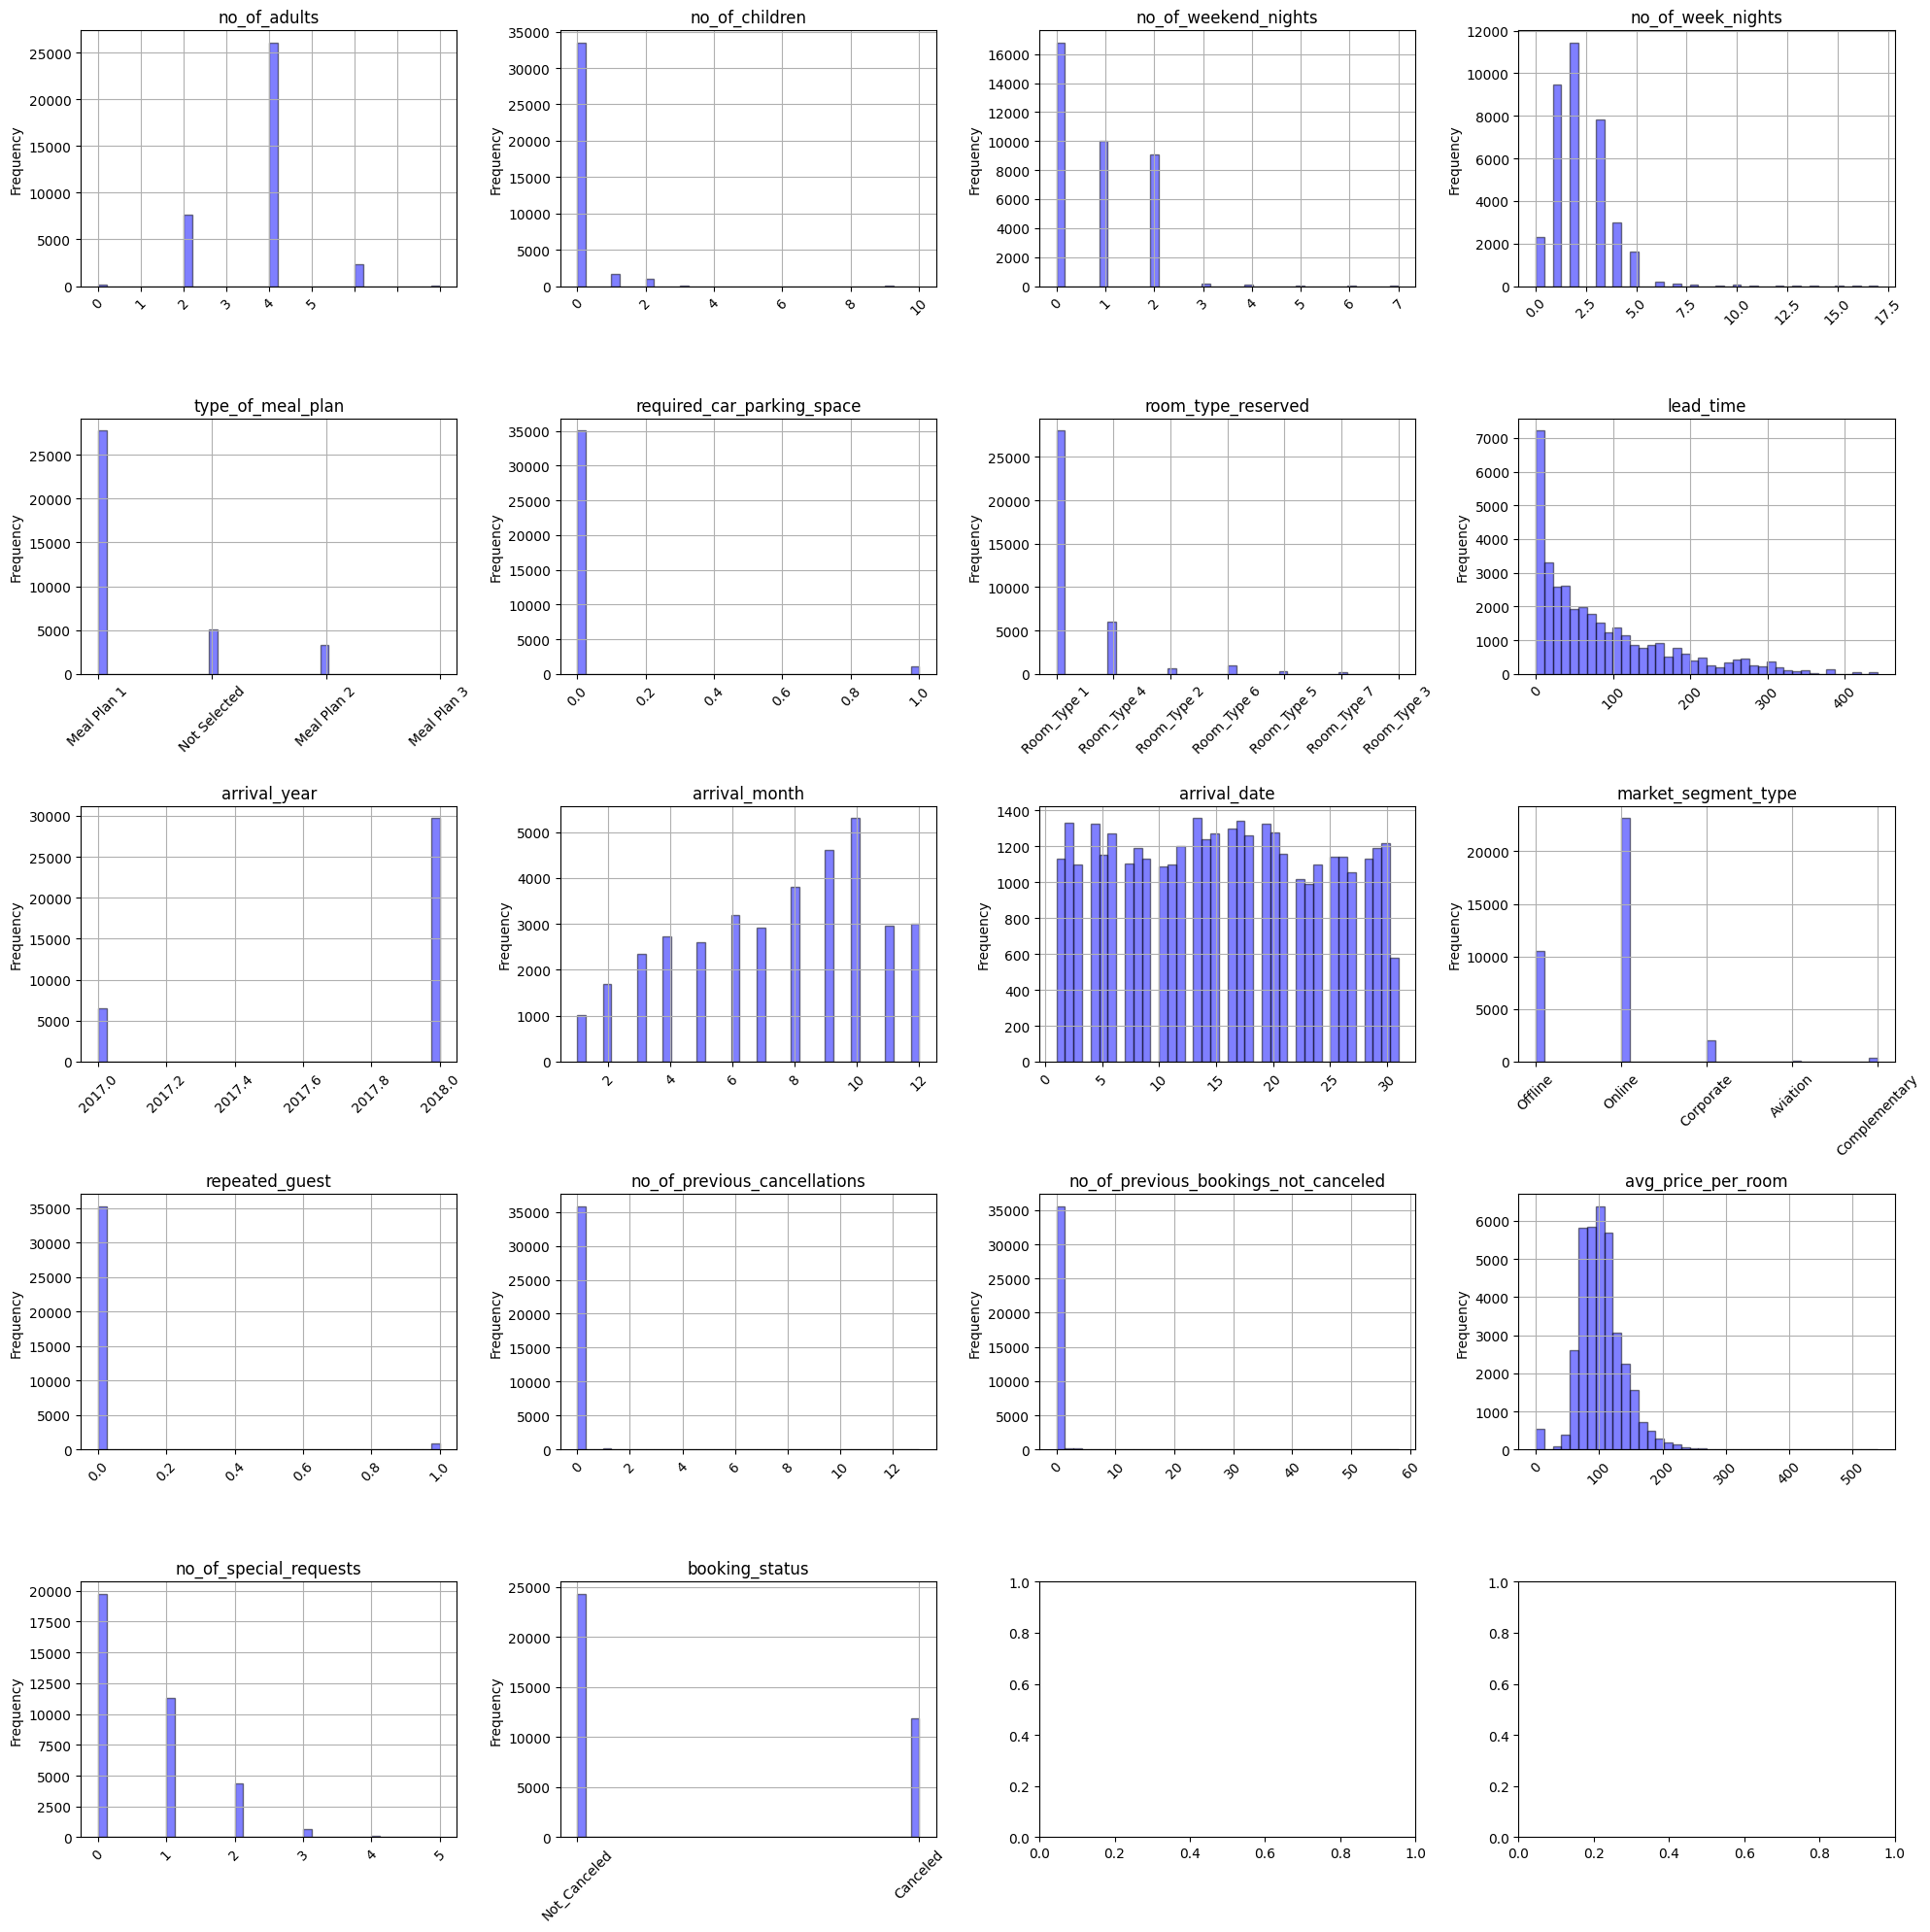

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

for i, col in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    df[col].hist(ax=ax,alpha=0.5, color='b', edgecolor='black',bins=40)
    # df[col].value_counts().plot.pie(ax=ax)  # ใช้ pie() แทน hist()
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

เมื่อ plot histogram ออกมา สามารถพบได้ว่า มี features   
no_of_previous_cancellations,
no_of_previous_bookings_not_canceled  
ที่ดูเหมือน values มีแค่ค่าเดียว    

In [ ]:
display(pd.DataFrame(df['no_of_previous_cancellations'].value_counts()))
display(pd.DataFrame(df['no_of_previous_bookings_not_canceled'].value_counts()))

,count
no_of_previous_cancellations,
0,35860
1,197
2,46
3,43
11,25
5,11
4,10
13,4
6,1


,count
no_of_previous_bookings_not_canceled,
0,35389
1,226
2,112
3,79
4,65
5,59
6,36
7,24
8,23


In [ ]:
df[['no_of_previous_cancellations','no_of_previous_bookings_not_canceled']].nunique()
for i in df[['no_of_previous_cancellations','no_of_previous_bookings_not_canceled']].columns:
  print(f"{i} : value_counts {df[i].nunique()}")

no_of_previous_cancellations : value_counts 9
no_of_previous_bookings_not_canceled : value_counts 59


เมื่อนำ ทั้ง 2 features นี้ออกมาดู ผลคือ มี values มากกว่า 1 ค่าทั้งหมด จึงไม่ต้องตัด features นี้ออก

# **4. Duplicated features**
(นำ columns ที่ซ้ำกันมารวมกัน)

In [ ]:
df[['arrival_year','arrival_month','arrival_date']].sample(5)

,arrival_year,arrival_month,arrival_date
34316,2017,10,7
3726,2017,9,9
10416,2018,3,9
12025,2018,12,8
5446,2018,7,3


นำ features เหล่านี้มารวมกันเพราะเป็น ปี เดือน วัน

In [ ]:
# df['datetime'] = pd.to_datetime(df[['arrival_year', 'arrival_month', 'arrival_date']].astype(str).agg('-'.join, axis=1))
# df['datetime'].head() #

สังเกตได้ว่ามีวันที่ ที่ผิดปกติ เพราะ Error แจ้ง

In [ ]:
def validate_date(row):
    try:
        pd.Timestamp(year=row['arrival_year'], month=row['arrival_month'], day=row['arrival_date'])
        return True
    except ValueError:
        return False

# Apply the function to each row.
df['valid_date'] = df[['arrival_year','arrival_month','arrival_date']].apply(validate_date, axis=1)

# Filter out invalid dates if any.
invalid_dates = df[['arrival_year','arrival_month','arrival_date']][~df['valid_date']]

# Showing invalid dates, if any, or proceed to convert to datetime.
invalid_dates , f'จำนวนที่ผิดพลาด {invalid_dates.shape[0]} แถว'

(       arrival_year  arrival_month  arrival_date
 2626           2018              2            29
 3677           2018              2            29
 5600           2018              2            29
 6343           2018              2            29
 7648           2018              2            29
 8000           2018              2            29
 8989           2018              2            29
 9153           2018              2            29
 9245           2018              2            29
 9664           2018              2            29
 9934           2018              2            29
 10593          2018              2            29
 10652          2018              2            29
 10747          2018              2            29
 11881          2018              2            29
 13958          2018              2            29
 14304          2018              2            29
 15363          2018              2            29
 15438          2018              2            29


พบว่า ในปี 2018 เดือน 2 มีวันที่ 29 ซึ่งตามปฏิทินแล้วไม่มีวันที่ 29 มีถึงวันที่ 28 และจำนวนที่ผิดพลาดมีจำนวนไม่มาก จึงทำการ drop rows

In [ ]:
df.drop(invalid_dates.index, axis=0, inplace=True)

In [ ]:
df['datetime'] = pd.to_datetime(df[['arrival_year', 'arrival_month', 'arrival_date']].astype(str).agg('-'.join, axis=1))
df.insert(4, 'datetime', df.pop('datetime')) #ปรับตำแหน่ง columns
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,datetime,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,valid_date
0,2,0,1,2,2017-10-02,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,True
1,2,0,2,3,2018-11-06,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,True
2,1,0,2,1,2018-02-28,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,True
3,2,0,0,2,2018-05-20,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,True
4,2,0,1,1,2018-04-11,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,True


ทำการลบ features ที่เหลือออก

In [ ]:
df.drop(columns='arrival_year',inplace=True)
df.drop(columns='arrival_month',inplace=True)
df.drop(columns='arrival_date',inplace=True)
df.drop(columns='valid_date',inplace=True) #มันมาตอนเช็ค วันที่ผิดพลาด

In [ ]:
display(df.head(1))
df.info()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,datetime,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,2017-10-02,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.0,0,Not_Canceled


<class 'pandas.core.frame.DataFrame'>
Index: 36160 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36160 non-null  int64         
 1   no_of_children                        36160 non-null  int64         
 2   no_of_weekend_nights                  36160 non-null  int64         
 3   no_of_week_nights                     36160 non-null  int64         
 4   datetime                              36160 non-null  datetime64[ns]
 5   type_of_meal_plan                     36160 non-null  object        
 6   required_car_parking_space            36160 non-null  int64         
 7   room_type_reserved                    36160 non-null  object        
 8   lead_time                             36160 non-null  int64         
 9   market_segment_type                   36160 non-null  object        
 10  rep

In [ ]:
df.shape

(36160, 16)

# **Summary data cleansing**
1. พบค่า Null ในรูปแบบการจองจำนวนวันเป็น 0 ทำการลบออก
   
2. ทำการลบ Booking_ID ออก เพราะไม่ได้ใช้งาน และไม่พบ ข้อมูลที่ความหมายเดียวกันแต่เขียนคนละแบบ
    
3. แสดงผลแต่ละ features ด้วย Histogram ไม่พบ values ที่มีค่าเดียว
     
4. Duplicate features ปีเดือนวัน เข้าด้วยกันแล้วแปลงเป็น datetime  (วันที่จอง)      

ำนวน rows และ columns ก่อนทำการ cleaning   
Rows : 36275    
Columns : 19

จำนวน rows และ columns หลังทำการ cleaning   
Rows : 36160   
Columns : 16  (ตัด day , month , year , booking_id และเพิ่ม datetime)

In [ ]:
df.sample(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,datetime,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
4098,3,0,0,4,2018-09-07,Meal Plan 1,0,Room_Type 6,31,Online,0,0,0,152.81,1,Canceled
12344,2,0,0,3,2018-06-14,Meal Plan 1,0,Room_Type 4,11,Corporate,0,0,0,90.00,0,Canceled
19156,1,0,0,2,2018-01-19,Meal Plan 1,0,Room_Type 1,151,Offline,0,0,0,71.00,0,Not_Canceled


<ipython-input-24-a5e229770bf9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


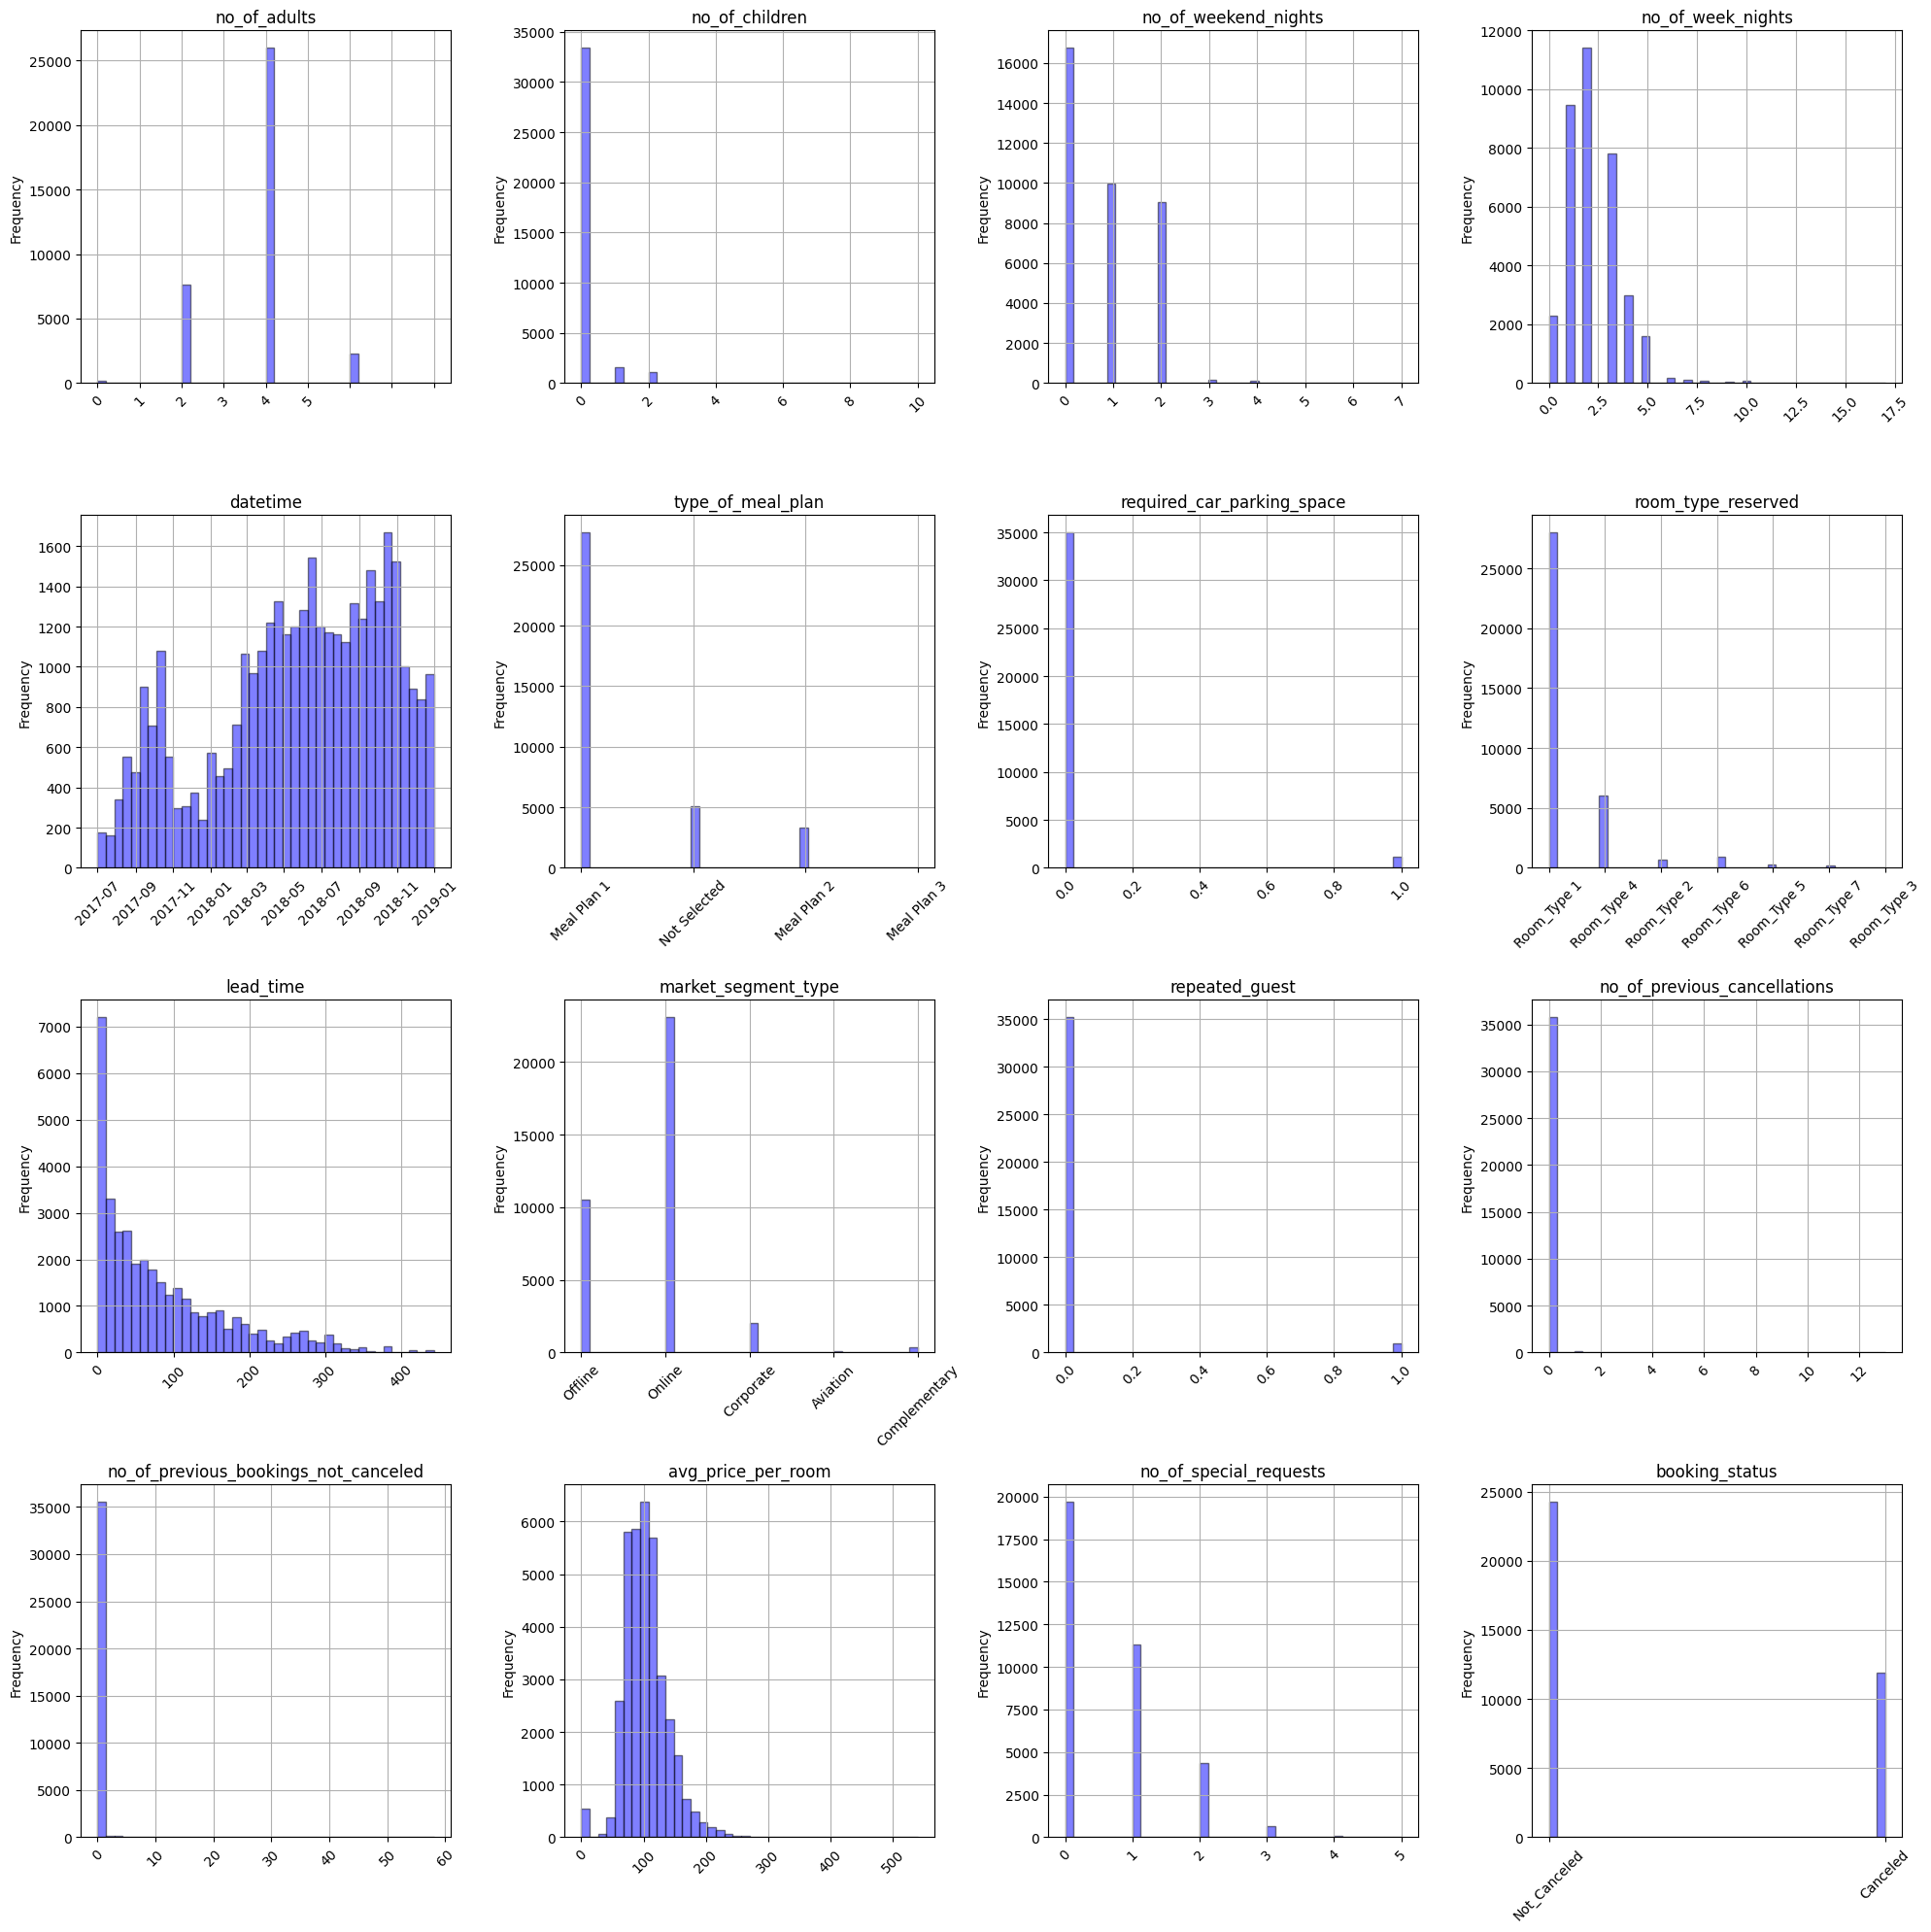

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, col in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    df[col].hist(ax=ax,alpha=0.5, color='b', edgecolor='black',bins=40)
    # df[col].value_counts().plot.pie(ax=ax)  # ใช้ pie() แทน hist()
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# **Exploratory data analysis for naive bayes**
ขั้นตอนที่ดูความสัมพันธ์ของข้อมูล และข้อมูลสำหรับ train model

# **1. Statistics Summary**
ดูค่าสถิติในข้อมูล

แปลง พวก columns ที่เป็น objects ให้เป็น ตัวเลขก่อนเพื่อใช้ describe แสดงออกมาทั้งหมด


In [ ]:
df_stat = df.copy()
enc = LabelEncoder()
for col in ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']:
    df_stat[col] = enc.fit_transform(df_stat[col])
    le_name_mapping = dict(zip(enc.classes_, enc.transform(enc.classes_)))
    print(le_name_mapping)


{'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Meal Plan 3': 2, 'Not Selected': 3}
{'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2, 'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6}
{'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Offline': 3, 'Online': 4}
{'Canceled': 0, 'Not_Canceled': 1}


In [ ]:
df_stat.drop(columns='datetime').describe().T #ไม่ได้ลบ datetime แต่ไม่เอามันมาโชว์ ในสถิติ

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36160.0,1.845769,0.518494,0.0,2.00,2.000,2.00,4.0
no_of_children,36160.0,0.105254,0.402617,0.0,0.00,0.000,0.00,10.0
no_of_weekend_nights,36160.0,0.812223,0.871116,0.0,0.00,1.000,2.00,7.0
no_of_week_nights,36160.0,2.208960,1.408581,0.0,1.00,2.000,3.00,17.0
type_of_meal_plan,36160.0,0.515653,1.048073,0.0,0.00,0.000,0.00,3.0
required_car_parking_space,36160.0,0.031001,0.173323,0.0,0.00,0.000,0.00,1.0
room_type_reserved,36160.0,0.708739,1.399534,0.0,0.00,0.000,0.00,6.0
lead_time,36160.0,85.356637,85.959688,0.0,17.00,57.000,127.00,443.0
market_segment_type,36160.0,3.552793,0.680067,0.0,3.00,4.000,4.00,4.0
repeated_guest,36160.0,0.025498,0.157634,0.0,0.00,0.000,0.00,1.0


แสดงให้เห็นภาพรวมในแต่ละ columns ว่าส่วนใหญ่ข้อมูล เป็นอย่างไร    
จุดสังเกตผิดปกติคือ no_of_children    
mean : 0.105399 แสดงว่า ส่วนใหญ่ไม่ค่อยมีเด็กมาพัก    
max : 10 แสดงว่ามีเด็กมากถึง 10 คนมาพักต่อ 1 ห้อง    
สังเกตได้ว่า จำนวนเยอะผิดปกติที่เด็ก 10 จะมาพักในห้องเดียวกัน


In [ ]:
df['no_of_children'].value_counts()

no_of_children
0     33471
1      1613
2      1054
3        19
9         2
10        1
Name: count, dtype: int64

In [ ]:
df[df['no_of_children'] >= 9]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,datetime,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,2,10,0,2,2018-01-12,Meal Plan 1,0,Room_Type 4,37,Online,0,0,0,84.45,1,Not_Canceled
10041,1,9,2,1,2017-10-11,Meal Plan 1,0,Room_Type 1,11,Corporate,0,0,0,95.00,0,Not_Canceled
10061,2,9,2,5,2017-08-13,Meal Plan 1,0,Room_Type 2,8,Online,0,0,0,76.50,1,Canceled


มีเด็กเข้าพักมากกว่า 9 คน ถึง 3 แถว    
ซึ่งอาจมองว่าเป็น outlier ซึ่งหากคำนึงถึงหลักการของ naive bayes แล้ว  ต้องทำการตัดออก เพราะตอนทำ model อาจมีความน่าจะเป็นของตัว parameter = 0 ซึ่งเกิดมีปัญหาขึ้นได้ จึงตัดสินใจตัดออก ทั้ง 3 แถว

In [ ]:
indices_to_drop = df[df['no_of_children'] >= 9].index
df.drop(indices_to_drop, inplace=True)

In [ ]:
df[df['no_of_children'] >= 9]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,datetime,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


# **2. EDA Univariate Analysis**
การวิเคราะห์หรือการแสดงภาพชุดข้อมูลโดยใช้ตัวแปรทีละตัว

นำ features no_of_weekend_nights + no_of_week_nights มารวมกันเพื่อ plot histogram ดูความสัมพันธ์ เป็น feature ใหม่ที่ชื่อว่า total_day

In [ ]:
df['total_day'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df.insert(4, 'total_day', df.pop('total_day')) #ปรับตำแหน่ง columns
df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,total_day,datetime,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,3,2017-10-02,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,5,2018-11-06,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,3,2018-02-28,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled


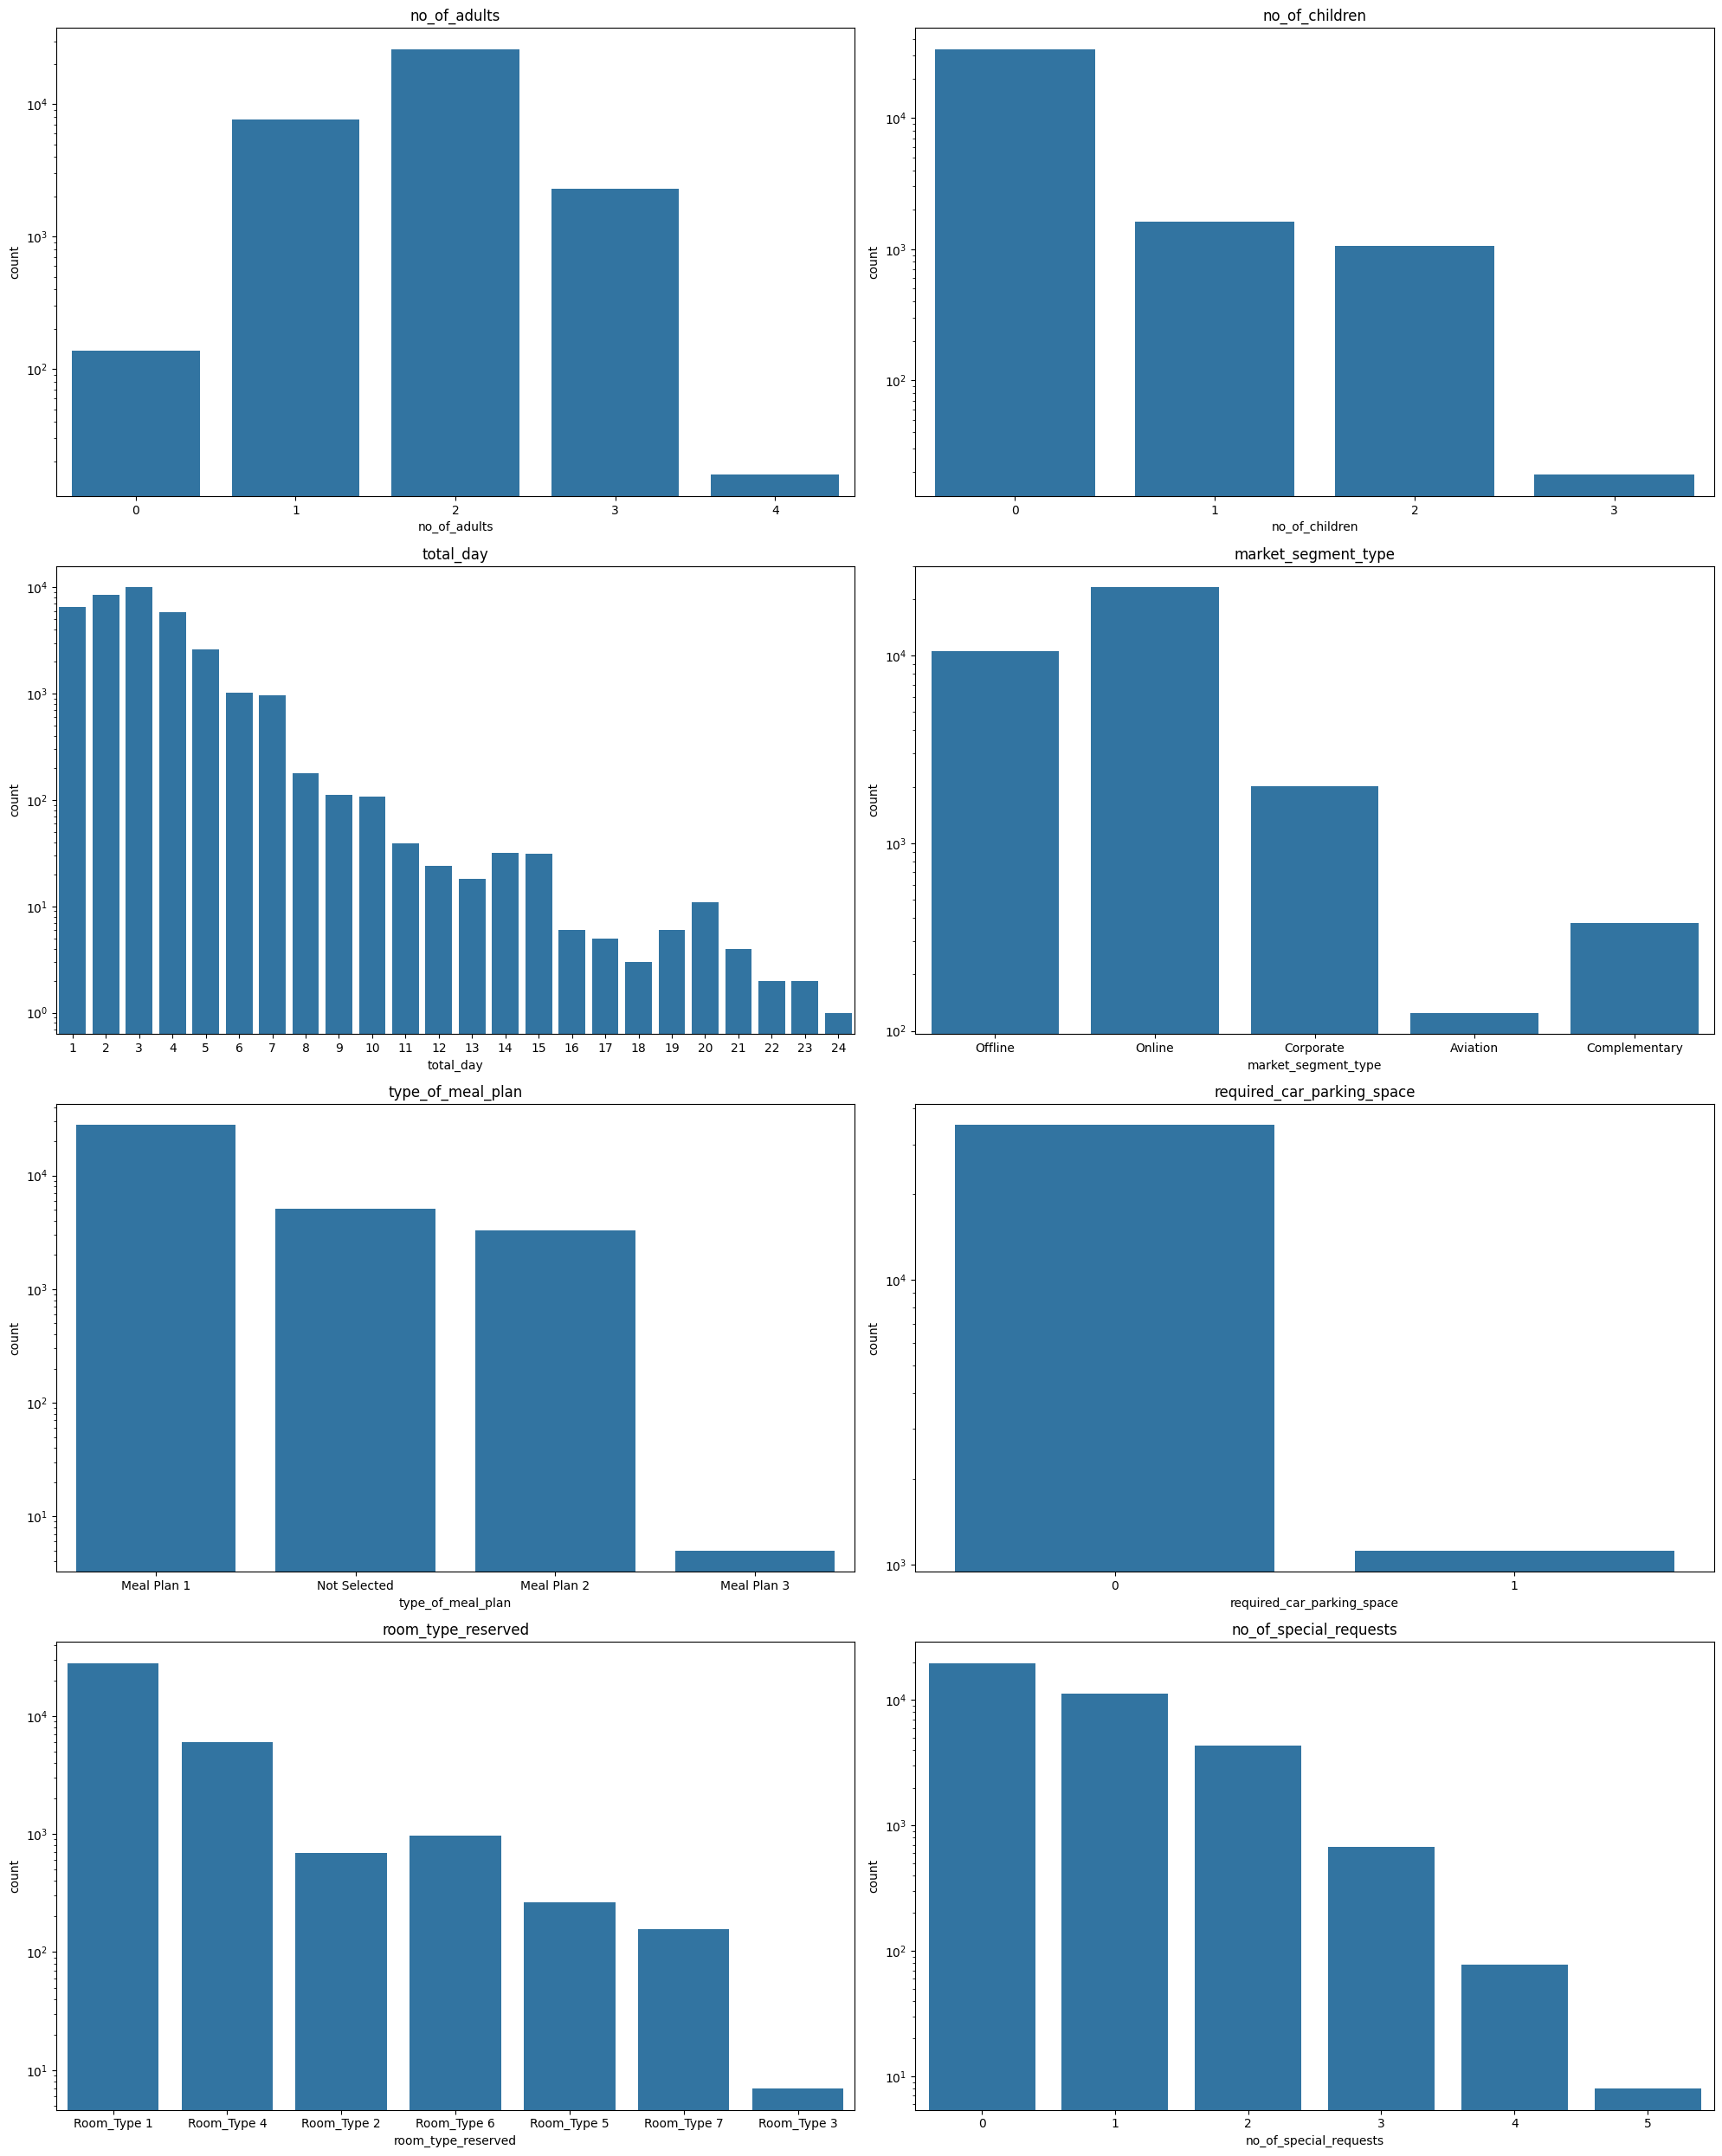

In [ ]:
data_plot = df
plt.figure(figsize=(20,25))
columns = ['no_of_adults','no_of_children','total_day','market_segment_type','type_of_meal_plan','required_car_parking_space','room_type_reserved','no_of_special_requests']
for i, col in enumerate(columns):
    ax = plt.subplot(4, 2, i+1)
    sns.countplot(x=col, data=data_plot)
    ax.set_yscale('log')  # ตั้งค่าให้แกน y เป็น logarithmic scale
    ax.set_title(col)

plt.tight_layout()
plt.show()

กราฟนี้เป็นกราฟ ฮิสโตแกรมของ features ที่ทำให้เห็นภาพรวมของโรงแรม   

แถวที่ 1 ของกราฟ แสดงให้เห็นว่ามีผู้ใหญ่มาพักส่วนมาก ที่ 2 คน และส่วนมากจะไม่มีเด็กมาพัก   
  
แถวที่ 2 ของกราฟแสดงให้เห็นว่าส่วนมากคนที่จองโรงแรมแห่งนี้จะพักโดยเฉลี่ย 3 วันและส่วนมากจะจอง ผ่าน online
  
แถวที่ 3 ของกราฟแสดงให้เห็นว่าลูกค้าส่วนมากไม่เลือกที่จะรับบริการอาหาร meal plan 1 และไม่รับบริการที่จอดรถ

แถวที่ 4 ของกราฟแสดงให้เห็นว่าประเภทห้องที่ลูกค้าจอง ส่วนใหญ่จะเป็นประเภทแรก และส่วนมากไม่รับอะไรเพิ่มเติม




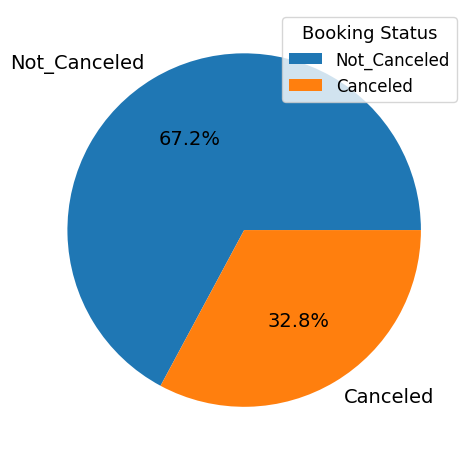

In [ ]:
plt.figure(figsize=(5, 10))
plt.pie(df['booking_status'].value_counts(), labels=df['booking_status'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 14})

# เพิ่ม legend
plt.legend(title="Booking Status", title_fontsize='13', fontsize='12')

# ปรับ layout และแสดงผล
plt.tight_layout()
plt.show()

กราฟพายชาร์ตนี้แสดงให้เห็น ว่า Targets มี 2 Values คือ    
Not_Canceled , Canceled ซึ่ง    
Not_canceled มีเยอะกว่า Canceled

\โดยสรุปของ EDA Univariate Analysis นั้นทำให้เห็นในภาพรวมของข้อมูล ว่าในแต่ละ Feature เป็นอย่างไร Values ไหนมากกว่ากัน Datasets ชุดนี้ส่วนมากเป็นอย่างไร

# **3. EDA Bivariate Analysis**
การวิเคราะห์หรือการแสดงภาพชุดข้อมูลโดยใช้ตัวแปรทีละ 2 ตัว

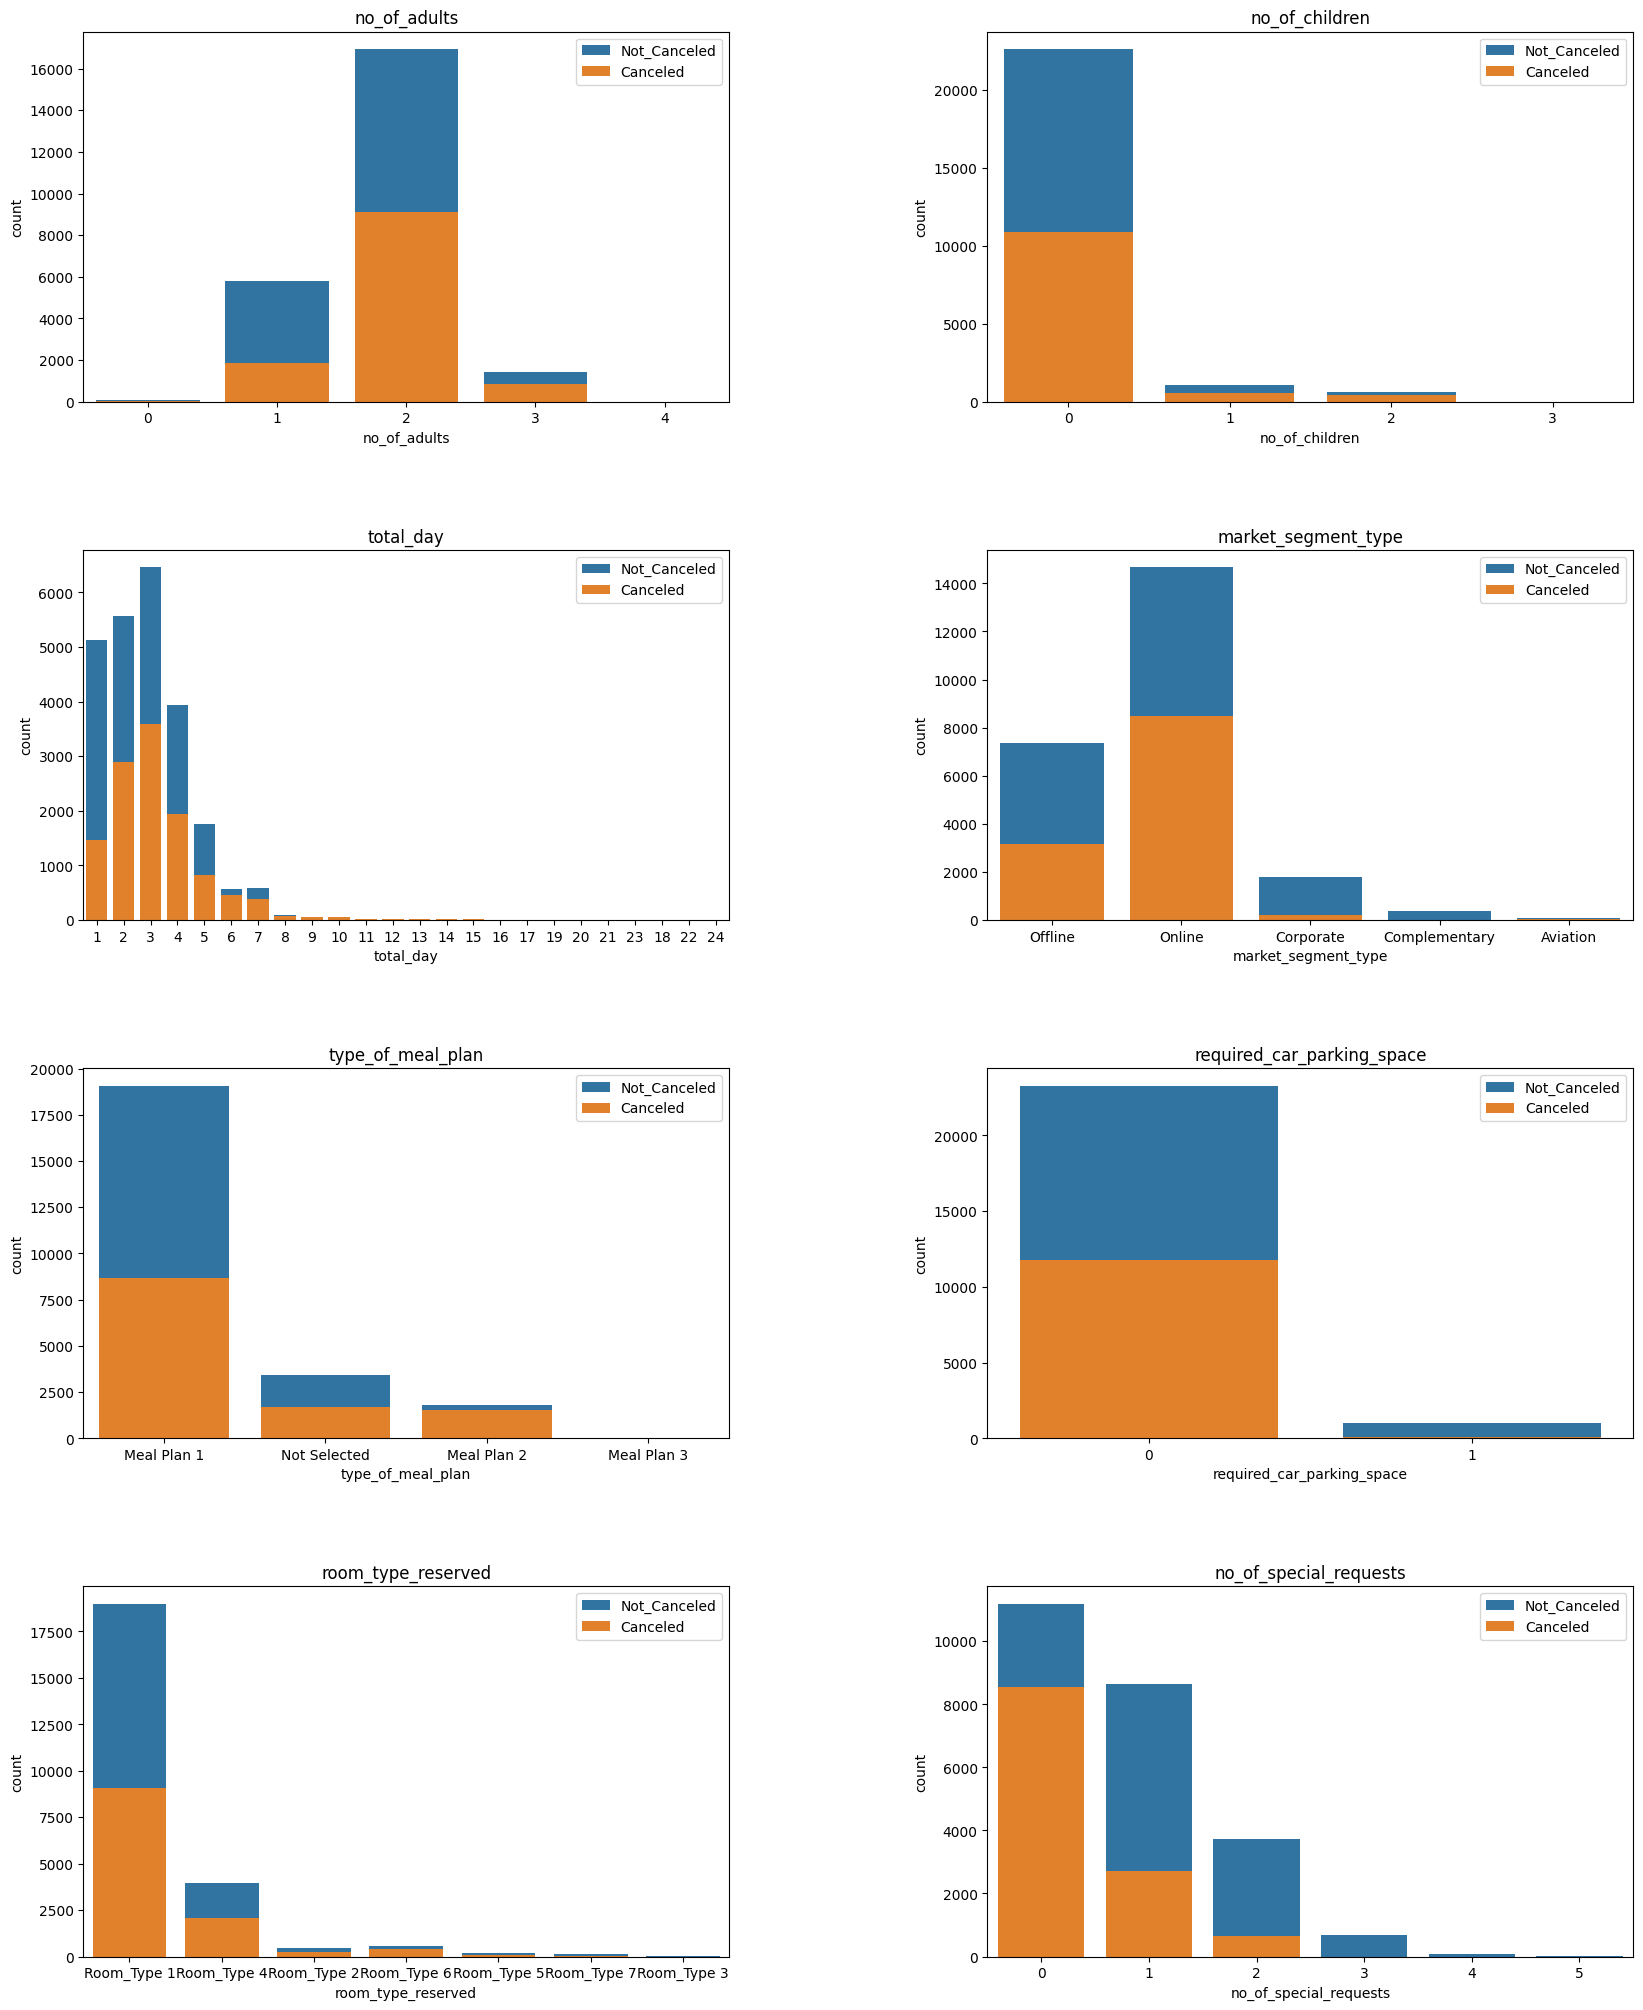

In [ ]:
plt.figure(figsize=(20,25))
#เลือก เฉพาะ columns ที่น่าสนใจ
columns = ['no_of_adults','no_of_children','total_day','market_segment_type','type_of_meal_plan','required_car_parking_space','room_type_reserved','no_of_special_requests']
statuses = df['booking_status'].unique()

for i, col in enumerate(columns):
    plt.subplot(4, 2, i+1)
    plt.gca().set_title(col)
    for status in statuses:
        sns.countplot(x=col, data=df[df['booking_status'] == status], label=status)
    # plt.gca().set_yscale('log') # Set the scale of y-axis to logarithmic

plt.legend(loc='upper right')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


กราฟทั้งหมดนี้ มี features ที่เป็น Targets มารวมด้วย   ทำให้เห็นว่า ใน features แต่ละ values ส่วนมาก Targets จะเป็นอย่างไร        จะยกเลิกการจองโรงแรมหรือไม                                      ซึ่งจากที่เห็นในกราฟทั้งโดยภาพรวม ส่วนมากสีน้ำเงินและสีส้มจะอยู่อัตราส่วนที่ พอดีกัน 50 : 50 เป็นส่วนใหญ่

ในส่วนของ avg_ของต่อวัน)เช่น   
จอง 3 วัน ราคาเฉลี่ยต่อวันคือ 30 ยูโร แสดงว่าจะเสียค่าใช้จ่ายทั้งหมด 90 ยูโร แต่ข้อมูลไม่ได้บอกว่า ราคาเฉลี่ยต่อวันนี้ รวมปัจจัยกับ features อื่นหรือไม่ ดังนั้นจะมาเช็ค ระหว่าง avg_price_per_room กับ features อื่นๆ มันอิสระต่อกันหรือไม่อิสระต่อกัน   
**[จำนวนคนทั้งหมดที่เข้าพัก,ชนิดของห้อง,เลือกที่จอดรถ,การจองล่วงหน้า]**

<ipython-input-35-745b98c7ea46>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)


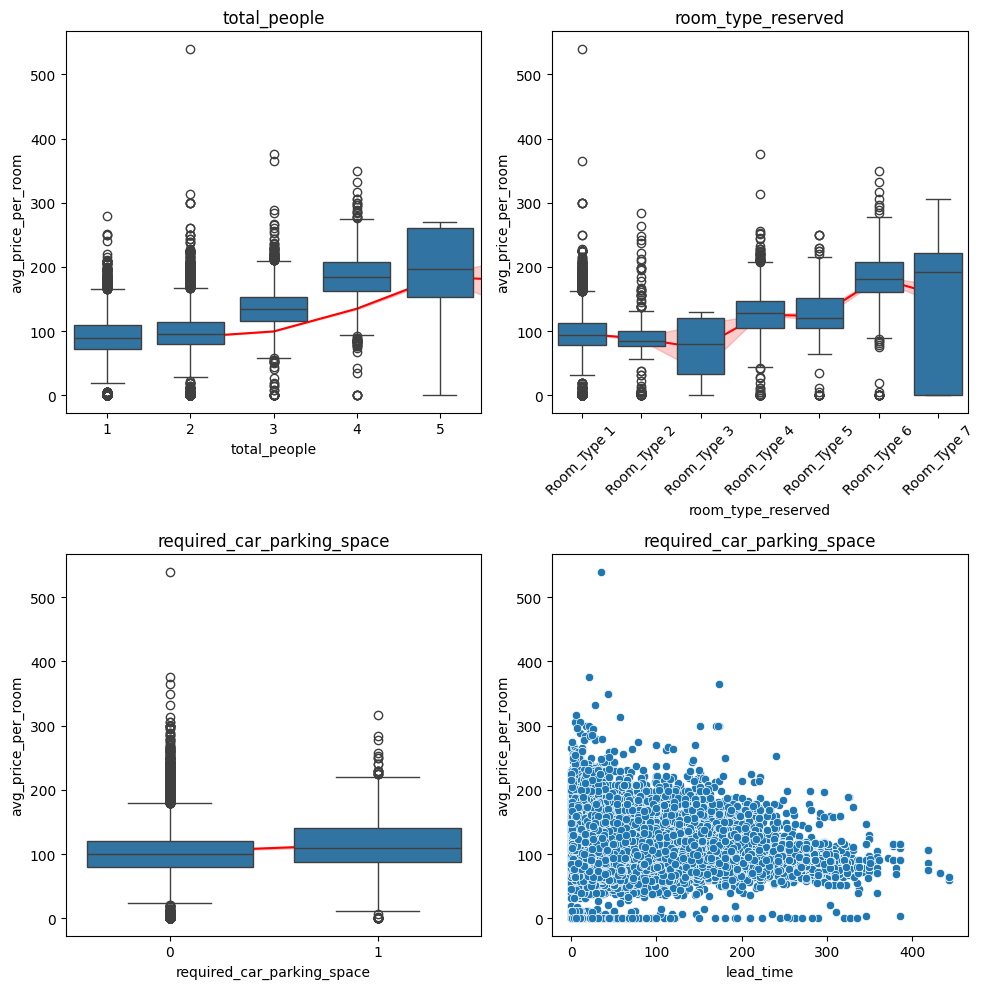

In [ ]:
df['total_people'] = df['no_of_adults'] + df['no_of_children']
#no_of_adults(จำนวนผู้ใหญ่ที่เข้าพัก) + no_of_children(จำนวนเด็กที่เข้าพัก) = total_peoples(จำนวนลูกค้าทั้งหมดที่เข้าพัก)

df.insert(2, 'total_people', df.pop('total_people')) #ปรับตำแหน่ง columns

#นำ room_type_reserved มาเรียง
df_sort = df.copy()
df_sort.sort_values('room_type_reserved',inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # กำหนดให้มี 3 แถว 1 คอลัมน์ของ subplots

# Subplot 1: total_people
sns.lineplot(ax=axes[0,0], x='total_people', y='avg_price_per_room', data=df, color='red')
sns.boxplot(ax=axes[0,0], x='total_people', y='avg_price_per_room', data=df)
axes[0,0].set_title('total_people')

# Subplot 2: room_type_reserved
sns.lineplot(ax=axes[0,1], x='room_type_reserved', y='avg_price_per_room', data=df_sort, color='red')
sns.boxplot(ax=axes[0,1], x='room_type_reserved', y='avg_price_per_room', data=df_sort)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
axes[0,1].set_title('room_type_reserved')

# Subplot 3: required_car_parking_space
sns.lineplot(ax=axes[1,0], x='required_car_parking_space', y='avg_price_per_room', data=df, color='red')
sns.boxplot(ax=axes[1,0], x='required_car_parking_space', y='avg_price_per_room', data=df)
axes[1,0].set_title('required_car_parking_space')

# Subolot 4: lead_time
sns.scatterplot(ax=axes[1,1],data=df, x='lead_time', y='avg_price_per_room')
axes[1,1].set_title('required_car_parking_space')

# sns.lineplot(ax=axes[1,0], x='no_of_special_requests	', y='avg_price_per_room', data=df, color='red')
# sns.boxplot(ax=axes[1,0], x='no_of_special_requests	', y='avg_price_per_room', data=df)
# axes[1,0].set_title('required_car_parking_space')

plt.tight_layout()  # ปรับ layout ให้พอดีกับหน้าจอ
plt.show()  # แสดงผลกราฟ

กราฟนี้แสดงให้เห็นว่า avg_price_per_room นั้นไม่อิสระต่อกันกับ features อื่นๆ
ที่เห็นได้ชัดเลยคือ lead_time ตามหลักความเป็นจริงเมื่อ จองล่วงหน้าหลายๆวัน ราคาจะถูกลง ซึ่งแนวโน้มกราฟ ราคาต่ำลงเมื่อ ระยะการจองล่วงหน้ายิ่งสูง

และกราฟนี้แสดงให้เห็นถึง outliner 1 จุดที่ดูราคา avg_price_per_room มากจนเกินไปดังนั้นจะ ตัดออกด้วยเหตุผล 2 ข้อ    
1.เวลานำไปคำนวณ naive bayes อาจจะมีปัญหาหลีกเลี่ยงเหตุการณ์ที่เป็น 0   
2.หลักความเป็นจริงมันสูงกว่าค่าเฉลี่ยอย่างมาก

In [ ]:
over_price = df[df.avg_price_per_room >= 400].index
df.drop(over_price, inplace=True)
df[df.avg_price_per_room >= 400]

,no_of_adults,no_of_children,total_people,no_of_weekend_nights,no_of_week_nights,total_day,datetime,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


# **4.EDA Multivariate Analysis**   
**การวิเคราะห์หรือการแสดงภาพชุดข้อมูลโดยใช้ตัวแปรตั้งแต่ 3 ตัวขึ้นไป**

<Axes: xlabel='lead_time', ylabel='avg_price_per_room'>

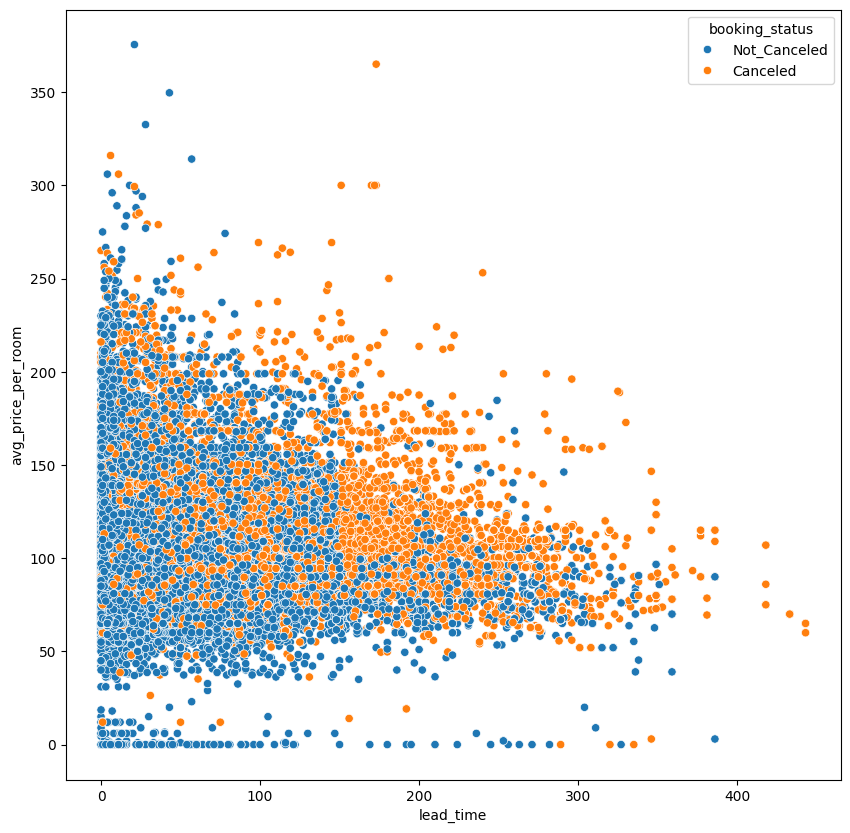

In [ ]:
plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status')

กราฟนี้แสดงให้เห็นว่า เมื่อราคาเฉลี่ยต่อห้องถูกลง และระยะเวลาในการจองเพิ่มขึ้น ช่วง lead_time 150 - 300 มีการยกเลิกจองที่เยอะมาก แต่ช่วง lead_time แรกๆ ไม่ค่อยยกเลิกจอง ก็แสดงให้เห็นว่า การจองนานๆ ถึงราคาจะถูกก็จริง แต่ว่าลูกค้าอาจจะลืม ซึ่งทำให้โรงแรมอาจจะได้ ค่ามัดจำก็ได้

# **Pre-Model Training**

# **1.String convert to Integer**
แปลง columns ที่เป็น object แทนด้วยตัวเลข
ด้วยเทคนิค Encoder

In [ ]:
enc = LabelEncoder()
for col in ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']:
    df[col] = enc.fit_transform(df[col])
    le_name_mapping = dict(zip(enc.classes_, enc.transform(enc.classes_)))
    print(le_name_mapping)

{'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Meal Plan 3': 2, 'Not Selected': 3}
{'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2, 'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6}
{'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Offline': 3, 'Online': 4}
{'Canceled': 0, 'Not_Canceled': 1}


# **2.Selecting Features**   
**เลือกใช้ เทคนิคดูค่า correlations ทุก features กับ label**

เตรียมพร้อมของข้อมูล ลบ columns ที่ไม่เกี่ยวข้องออก และ datatime นำมาแต่เดือนเพื่อดูความสัมพันธ์

In [ ]:
df.drop(columns='total_people',inplace=True)
df.drop(columns='total_day',inplace=True)
df['month'] = df['datetime'].dt.month
df.drop(columns='datetime',inplace=True)
df.insert(4, 'month', df.pop('month')) #ปรับตำแหน่ง columns
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,month,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,10,0,0,0,224,3,0,0,0,65.00,0,1
1,2,0,2,3,11,3,0,0,5,4,0,0,0,106.68,1,1
2,1,0,2,1,2,0,0,0,1,4,0,0,0,60.00,0,0
3,2,0,0,2,5,0,0,0,211,4,0,0,0,100.00,0,0
4,2,0,1,1,4,3,0,0,48,4,0,0,0,94.50,0,0


In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,month,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,10,0,0,0,224,3,0,0,0,65.00,0,1
1,2,0,2,3,11,3,0,0,5,4,0,0,0,106.68,1,1
2,1,0,2,1,2,0,0,0,1,4,0,0,0,60.00,0,0
3,2,0,0,2,5,0,0,0,211,4,0,0,0,100.00,0,0
4,2,0,1,1,4,3,0,0,48,4,0,0,0,94.50,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36156 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36156 non-null  int64  
 1   no_of_children                        36156 non-null  int64  
 2   no_of_weekend_nights                  36156 non-null  int64  
 3   no_of_week_nights                     36156 non-null  int64  
 4   month                                 36156 non-null  int32  
 5   type_of_meal_plan                     36156 non-null  int64  
 6   required_car_parking_space            36156 non-null  int64  
 7   room_type_reserved                    36156 non-null  int64  
 8   lead_time                             36156 non-null  int64  
 9   market_segment_type                   36156 non-null  int64  
 10  repeated_guest                        36156 non-null  int64  
 11  no_of_previous_cance

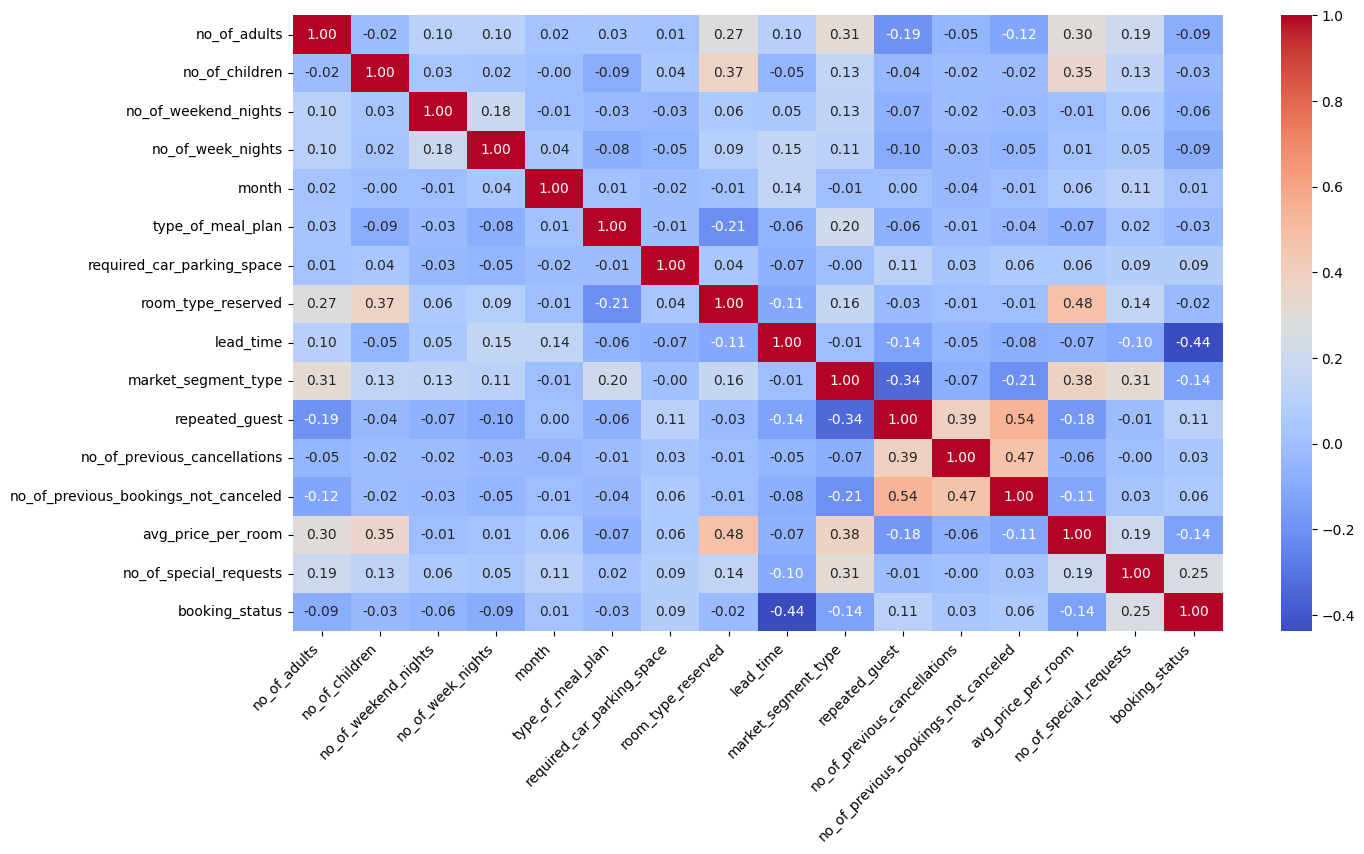

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
corr_matrix['booking_status'].sort_values()

lead_time                              -0.438518
avg_price_per_room                     -0.139861
market_segment_type                    -0.136030
no_of_week_nights                      -0.090975
no_of_adults                           -0.086121
no_of_weekend_nights                   -0.060503
no_of_children                         -0.033843
type_of_meal_plan                      -0.026885
room_type_reserved                     -0.023305
month                                   0.011783
no_of_previous_cancellations            0.033929
no_of_previous_bookings_not_canceled    0.060102
required_car_parking_space              0.086352
repeated_guest                          0.107517
no_of_special_requests                  0.253476
booking_status                          1.000000
Name: booking_status, dtype: float64

ค่า = 1: หมายถึงมีความสัมพันธ์เชิงเส้นที่สมบูรณ์แบบในทางบวกระหว่างสองตัวแปรนั้น หมายความว่าเมื่อค่าของตัวแปร
𝑥
x เพิ่มขึ้น, ค่าของตัวแปร
𝑦
y ก็จะเพิ่มขึ้นอย่างสม่ำเสมอ และไม่มีข้อมูลที่เบี่ยงเบนออกจากเส้นที่แสดงความสัมพันธ์นั้น      

ค่า = 0: ไม่มีความสัมพันธ์เชิงเส้นระหว่างตัวแปรทั้งสอง ในกรณีนี้, ไม่สามารถใช้ค่าของ
𝑥
x เพื่อทำนายค่าของ
𝑦
y ได้       

ค่าติดลบ (ระหว่าง -1 ถึง 0): มีความสัมพันธ์เชิงเส้นทางลบระหว่างสองตัวแปรนั้น หมายความว่าเมื่อค่าของตัวแปร
𝑥
x เพิ่มขึ้น, ค่าของตัวแปร
𝑦
y จะลดลง และในทางกลับกัน และถ้าค่าคือ -1 หมายถึงความสัมพันธ์เชิงเส้นทางลบที่สมบูรณ์แบบ   

โดยสรุปค่ายิ่งเข้าใกล้ 0 ยิ่งไม่มีความสัมพันธ์

In [ ]:
sorted_corr = corr_matrix['booking_status'].abs().sort_values()
sorted_corr

month                                   0.011783
room_type_reserved                      0.023305
type_of_meal_plan                       0.026885
no_of_children                          0.033843
no_of_previous_cancellations            0.033929
no_of_previous_bookings_not_canceled    0.060102
no_of_weekend_nights                    0.060503
no_of_adults                            0.086121
required_car_parking_space              0.086352
no_of_week_nights                       0.090975
repeated_guest                          0.107517
market_segment_type                     0.136030
avg_price_per_room                      0.139861
no_of_special_requests                  0.253476
lead_time                               0.438518
booking_status                          1.000000
Name: booking_status, dtype: float64

โดยสรุปแล้ว ความสัมพันธ์ ระหว่าง ทุก features กับ label นั้น
มีค่าที่เข้าใกล้ 0 มากๆคือ  (น้อยกว่า 0.1)       
month                                   0.011783    
room_type_reserved                      0.023305    
type_of_meal_plan                       0.026885    
no_of_children                          0.033843     
no_of_previous_cancellations            0.033929    
no_of_previous_bookings_not_canceled    0.060102      
no_of_weekend_nights                    0.060503     
no_of_adults                            0.086121    
required_car_parking_space              0.086352     
no_of_week_nights                       0.090975       
   
อาจจะทำการ ทดลองตัดออกกับไม่ตัด ดูว่าประสิทธิภาพโมเดลเป็นอย่างไร

# **3.Distributions for Navie bayes**   
**เลือกการแจงแจงที่เหมาะสมกับ DATASETS**

เหตุผลที่เลือก 3 Distributions นี้เพราะว่ามีใน Scikit-Learn

Bernoulli Naive Bayes:
คุณสมบัติที่เหมาะสม: ใช้กับข้อมูลที่เป็น binary features, หมายถึงข้อมูลที่มีค่าเป็น 0 หรือ 1       

Multinomial Naive Bayes:
คุณสมบัติที่เหมาะสม: เหมาะสมกับข้อมูลที่เป็นจำนวนนับ    

Gaussian Naive Bayes:
คุณสมบัติที่เหมาะสม: ใช้กับข้อมูลที่มีการแจกแจงแบบปกติ โดยเฉพาะกับข้อมูลที่เป็น continuous values  


<ipython-input-45-a5e229770bf9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


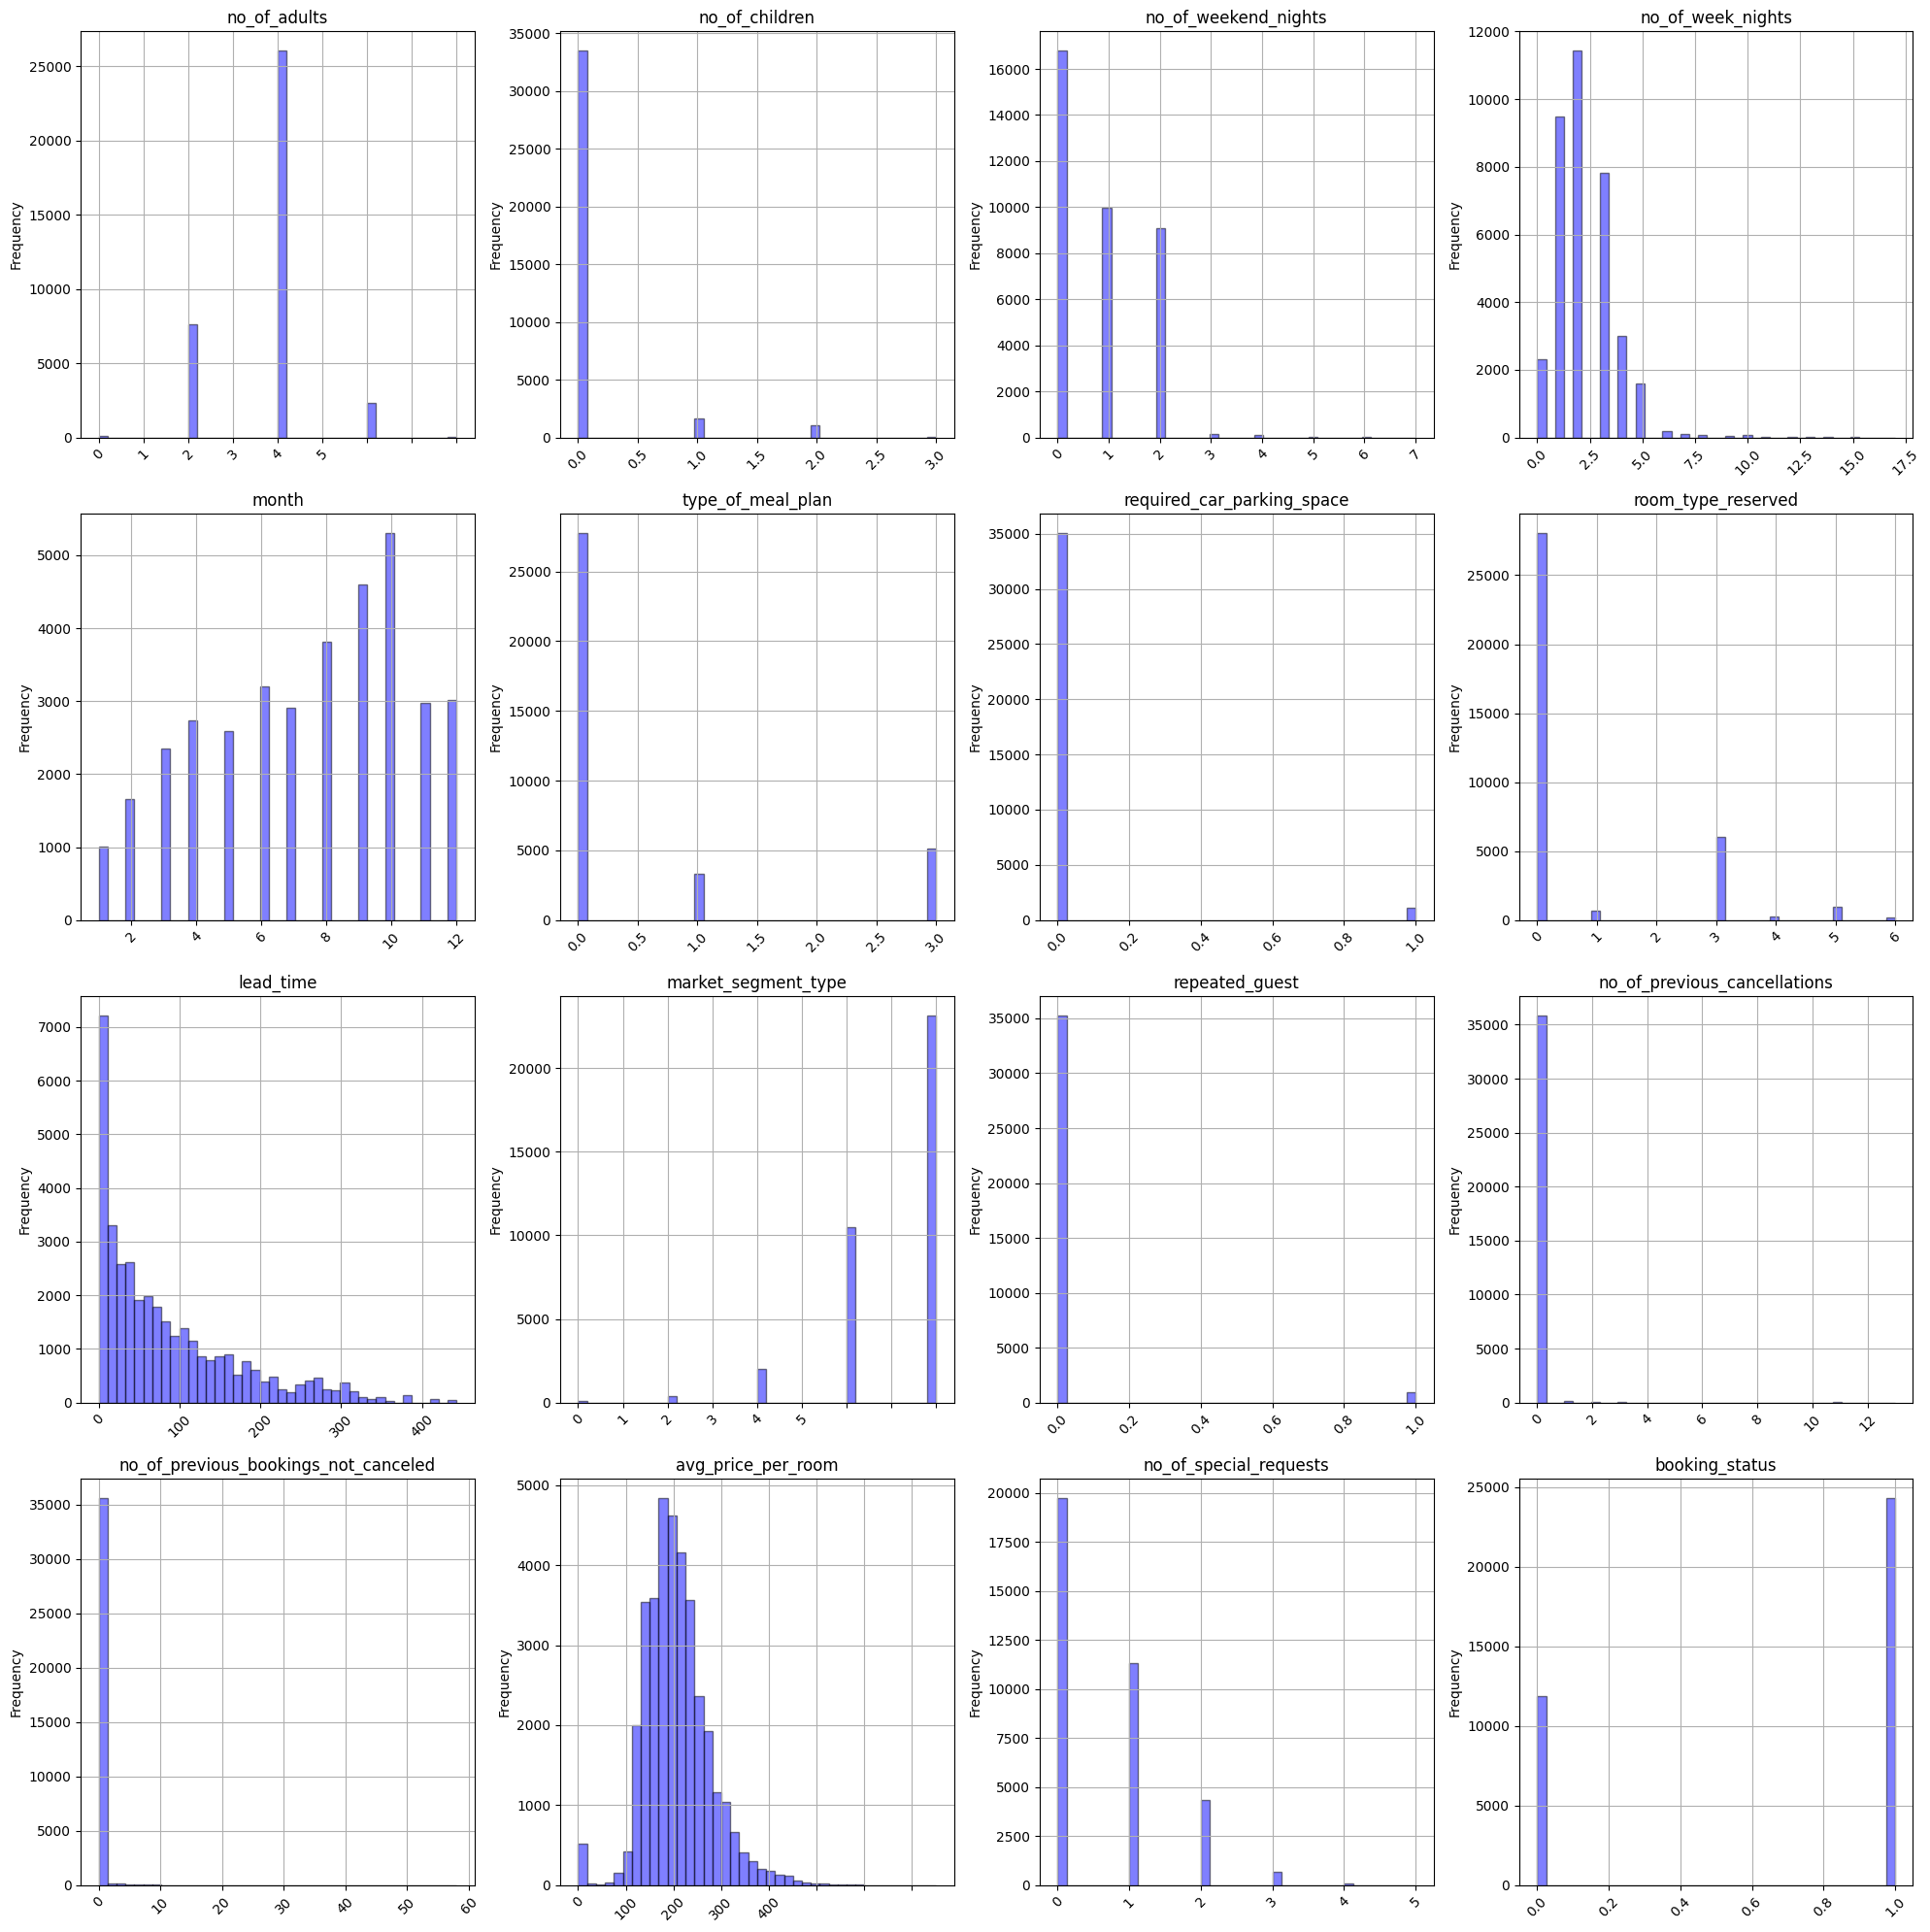

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, col in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    df[col].hist(ax=ax,alpha=0.5, color='b', edgecolor='black',bins=40)
    # df[col].value_counts().plot.pie(ax=ax)  # ใช้ pie() แทน hist()
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

การเลือกใช้ Distributions นั้นขึ้นอยู่กับว่า Features เป็นประเภทของข้อมูลแบบใด ซึ่งจากกราฟข้างบนแสดงให้เห็น ดังนั้น        
no_of_adults : **Multinomial Distribution**   
no_of_children : **Multinomial Distribution**   
no_of_weekend_nights : **Multinomial Distribution**   
no_of_week_nights : **Multinomial Distribution**   
month : **Multinomial Distribution**   
type_of_meal_plan : **Multinomial Distribution**   
required_car_parking_space : **Bernoulli Distribution**    
room_type_reserved : **Multinomial Distribution**   
lead_time : **Multinomial Distribution**   
market_segment_type : **Multinomial Distribution**   
repeated_guest : **Bernoulli Distribution**   
no_of_previous_cancellations : **Multinomial Distribution**    
no_of_previous_bookings_not_canceled : **Multinomial Distribution**   
avg_price_per_room : **Gaussian Distribution**   
no_of_special_requests : **Multinomial Distribution**    


ดังนั้น เมื่อ DATASETS ชุดนี้ในแต่ละ Features มีหลาย Distributions ที่เหมาะสมในแต่ละ Features ของมันเอง   
ดังนั้นจะเลือก Multinomial , Bernoulli , Gaussian นำมา Training

แต่ปัญหาคือ ในแต่ละ Distributions นั้นมีการทำงานไม่เหมือนกัน ดังนั้นเราจึงต้องแปลงข้อมูลให้เหมาะสมกับ Distributions ด้วย

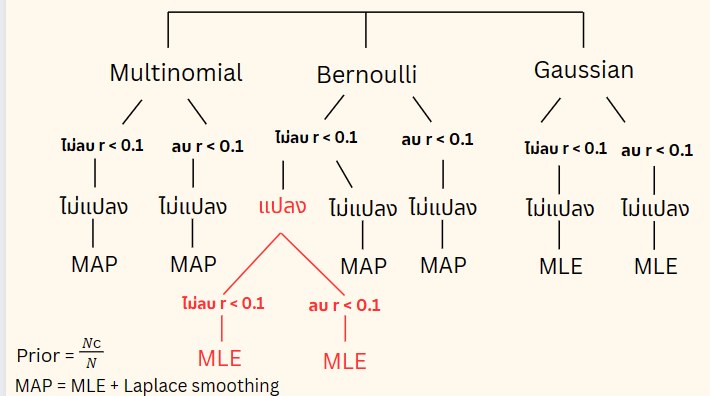

โดยสรุป จะทำการใช้ 3 Distributions ในการ training   
ซึ่งเหตุผลที่ใช้ 3 Distributions นี้เพราะมีใน Scikit learn    
และจาก Feature Selections ค่าของ correlations ที่ต่ำกว่า 0.05 และมากกว่า 0.05 จะนำมาเปรียบเทียบประสิทธิภาพกันว่าอันไหนดีกว่า
  
ในส่วนแปลง คือ แปลงข้อมูลให้เหมาะสมกับ Distributions นั้นๆ   
การเลือก MAP นั้นดูจากข้อมูลว่า มีค่าที่ความน่าจะเป็น 0 มั้ยในพารามิเตอร์ โมเดล naive bayes ซึ่งโดยปกติแล้วใน Scikit learn พื้นฐานจะใช้ MLE แต่ถ้า MAP ก็คือ MLE + Laplace smoothing

และในส่วนค่า Prior ความเชื่อความน่าจะเป็นของแต่ละ class ก่อนเห็นข้อมูลจริงนั้น เป็น สัดส่วนของแต่ละ class

# **4.Selections Data**   
โดยจะแบ่ง ข้อมูลไว้ train 80% , test 20%   
เหตุผลที่ train test ก่อนแล้วจึง แก้ไขข้อมูล หรือ ตัด features เพราะว่า จะได้ไม่ต้องแบ่ง train test อีกรอบและต้องการให้แบ่งหน้าตาเหมือนกัน

In [ ]:
df.shape

(36156, 16)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(28924, 15)

เตรียมข้อมูลให้พร้อม ในแผนผัง มีการแปลงข้อมูลที่ใช้สำหรับ Bernoulli ดังนั้นต้องแปลงข้อมูล ทุก columns ให้เป็น Binary

In [ ]:
X_train_Bernoulli_edit = X_train.copy()
X_test_Bernoulli_edit = X_test.copy()
# X_train = X_train.copy() #ไม่ลบ features
# X_test = X_test.copy() #ไม่ลบ features
X_train_del = X_train.drop(columns=sorted_corr[sorted_corr < 0.1].index)
X_test_del = X_test.drop(columns=sorted_corr[sorted_corr < 0.1].index)


# **5.Converts features for distributions**   
**ขั้นตอนสำหรับแปลงข้อมูลในแต่ละ features ให้เหมาะกับ Distributions ที่จะนำมา Training**

แปลง Bernoulli_edit แปลงข้อมูลทั้งหมดให้เป็นประเภท 0 1
ซึ่ง Datasets นี้แบ่งได้ 2 ส่วน    
ส่วนที่ 1 : features ที่เป็นไม่ใช่ categorical จะใช้เกณฑ์ใช้ค่าเฉลี่ยเป็นเกณฑ์ในการแบ่งแยก ถ้าน้อยกว่าค่าเฉลี่ย ก็เป็น 0 มากกว่าก็เป็น 1   

ส่วนที่ 2 : features ที่เป็น categorical จะใช้ one-hot-encoding
มาช่วยในแปลงเป็น 0 1

**ส่วนที่ 1**

In [ ]:

def categorize_data(value, mean):
    if value <= mean:
        return '0'
    else:
        return '1'

def categorize_column(column, mean):
    return column.apply(categorize_data, mean=mean)

# หาค่าเฉลี่ยของแต่ละคอลัมน์ X_train
mean_lead_time = X_train_Bernoulli_edit['lead_time'].mean()
mean_avg_price_per_room = X_train_Bernoulli_edit['avg_price_per_room'].mean()
mean_no_of_adults = X_train_Bernoulli_edit['no_of_adults'].mean()
mean_no_of_children = X_train_Bernoulli_edit['no_of_children'].mean()
mean_no_of_weekend_nights = X_train_Bernoulli_edit['no_of_weekend_nights'].mean()
mean_no_of_week_nights = X_train_Bernoulli_edit['no_of_week_nights'].mean()
mean_no_of_previous_cancellations = X_train_Bernoulli_edit['no_of_previous_cancellations'].mean()
mean_no_of_previous_bookings_not_canceled = X_train_Bernoulli_edit['no_of_previous_bookings_not_canceled'].mean()
mean_no_of_special_requests = X_train_Bernoulli_edit['no_of_special_requests'].mean()

# หาค่าเฉลี่ยของแต่ละคอลัมน์ X_test
mean_lead_time = X_test_Bernoulli_edit['lead_time'].mean()
mean_avg_price_per_room = X_test_Bernoulli_edit['avg_price_per_room'].mean()
mean_no_of_adults = X_test_Bernoulli_edit['no_of_adults'].mean()
mean_no_of_children = X_test_Bernoulli_edit['no_of_children'].mean()
mean_no_of_weekend_nights = X_test_Bernoulli_edit['no_of_weekend_nights'].mean()
mean_no_of_week_nights = X_test_Bernoulli_edit['no_of_week_nights'].mean()
mean_no_of_previous_cancellations = X_test_Bernoulli_edit['no_of_previous_cancellations'].mean()
mean_no_of_previous_bookings_not_canceled = X_test_Bernoulli_edit['no_of_previous_bookings_not_canceled'].mean()
mean_no_of_special_requests = X_test_Bernoulli_edit['no_of_special_requests'].mean()

# ใช้ฟังก์ชันสำหรับการแปลงค่าแต่ละคอลัมน์ X_train
X_train_Bernoulli_edit['month_categorize'] = categorize_column(X_train_Bernoulli_edit['month'], 6)
X_train_Bernoulli_edit['lead_time_categorize'] = categorize_column(X_train_Bernoulli_edit['lead_time'], mean_lead_time)
X_train_Bernoulli_edit['avg_price_per_room_categorize'] = categorize_column(X_train_Bernoulli_edit['avg_price_per_room'], mean_avg_price_per_room)
X_train_Bernoulli_edit['no_of_adults_categorize'] = categorize_column(X_train_Bernoulli_edit['no_of_adults'], mean_no_of_adults)
X_train_Bernoulli_edit['no_of_children_categorize'] = categorize_column(X_train_Bernoulli_edit['no_of_children'], mean_no_of_children)
X_train_Bernoulli_edit['no_of_weekend_nights_categorize'] = categorize_column(X_train_Bernoulli_edit['no_of_weekend_nights'], mean_no_of_weekend_nights)
X_train_Bernoulli_edit['no_of_week_nights_categorize'] = categorize_column(X_train_Bernoulli_edit['no_of_week_nights'], mean_no_of_week_nights)
X_train_Bernoulli_edit['no_of_previous_cancellations_categorize'] = categorize_column(X_train_Bernoulli_edit['no_of_previous_cancellations'], mean_no_of_previous_cancellations)
X_train_Bernoulli_edit['no_of_previous_bookings_not_canceled_categorize'] = categorize_column(X_train_Bernoulli_edit['no_of_previous_bookings_not_canceled'], mean_no_of_previous_bookings_not_canceled)
X_train_Bernoulli_edit['no_of_special_requests_categorize'] = categorize_column(X_train_Bernoulli_edit['no_of_special_requests'], mean_no_of_previous_bookings_not_canceled)

X_train_Bernoulli_edit.drop(columns=['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests','month','lead_time','avg_price_per_room'], inplace=True)

# ใช้ฟังก์ชันสำหรับการแปลงค่าแต่ละคอลัมน์ X_test
X_test_Bernoulli_edit['month_categorize'] = categorize_column(X_test_Bernoulli_edit['month'], 6)
X_test_Bernoulli_edit['lead_time_categorize'] = categorize_column(X_test_Bernoulli_edit['lead_time'], mean_lead_time)
X_test_Bernoulli_edit['avg_price_per_room_categorize'] = categorize_column(X_test_Bernoulli_edit['avg_price_per_room'], mean_avg_price_per_room)
X_test_Bernoulli_edit['no_of_adults_categorize'] = categorize_column(X_test_Bernoulli_edit['no_of_adults'], mean_no_of_adults)
X_test_Bernoulli_edit['no_of_children_categorize'] = categorize_column(X_test_Bernoulli_edit['no_of_children'], mean_no_of_children)
X_test_Bernoulli_edit['no_of_weekend_nights_categorize'] = categorize_column(X_test_Bernoulli_edit['no_of_weekend_nights'], mean_no_of_weekend_nights)
X_test_Bernoulli_edit['no_of_week_nights_categorize'] = categorize_column(X_test_Bernoulli_edit['no_of_week_nights'], mean_no_of_week_nights)
X_test_Bernoulli_edit['no_of_previous_cancellations_categorize'] = categorize_column(X_test_Bernoulli_edit['no_of_previous_cancellations'], mean_no_of_previous_cancellations)
X_test_Bernoulli_edit['no_of_previous_bookings_not_canceled_categorize'] = categorize_column(X_test_Bernoulli_edit['no_of_previous_bookings_not_canceled'], mean_no_of_previous_bookings_not_canceled)
X_test_Bernoulli_edit['no_of_special_requests_categorize'] = categorize_column(X_test_Bernoulli_edit['no_of_special_requests'], mean_no_of_previous_bookings_not_canceled)

X_test_Bernoulli_edit.drop(columns=['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests','month','lead_time','avg_price_per_room'], inplace=True)


**ส่วนที่ 2**

In [ ]:
# ทำ One-Hot Encoding ด้วย pd.get_dummies()
one_hot_encoded = pd.get_dummies(X_train_Bernoulli_edit['type_of_meal_plan'], prefix='meal_plan')
one_hot_encoded_2 = pd.get_dummies(X_train_Bernoulli_edit['room_type_reserved'], prefix='room_type')
one_hot_encoded_3 = pd.get_dummies(X_train_Bernoulli_edit['market_segment_type'], prefix='Type_segment')

one_hot_encoded_test = pd.get_dummies(X_test_Bernoulli_edit['type_of_meal_plan'], prefix='meal_plan')
one_hot_encoded_2_test = pd.get_dummies(X_test_Bernoulli_edit['room_type_reserved'], prefix='room_type')
one_hot_encoded_3_test = pd.get_dummies(X_test_Bernoulli_edit['market_segment_type'], prefix='Type_segment')


# เชื่อมรายการ One-Hot Encoded เข้ากับ DataFrame หลัก
X_train_Bernoulli_edit = pd.concat([X_train_Bernoulli_edit, one_hot_encoded], axis=1)
X_train_Bernoulli_edit = pd.concat([X_train_Bernoulli_edit, one_hot_encoded_2], axis=1)
X_train_Bernoulli_edit = pd.concat([X_train_Bernoulli_edit, one_hot_encoded_3], axis=1)

X_test_Bernoulli_edit = pd.concat([X_test_Bernoulli_edit, one_hot_encoded_test], axis=1)
X_test_Bernoulli_edit = pd.concat([X_test_Bernoulli_edit, one_hot_encoded_2_test], axis=1)
X_test_Bernoulli_edit = pd.concat([X_test_Bernoulli_edit, one_hot_encoded_3_test], axis=1)

# drop columns เก่าออก
X_train_Bernoulli_edit.drop(columns=['type_of_meal_plan'], inplace=True)
X_train_Bernoulli_edit.drop(columns=['room_type_reserved'], inplace=True)
X_train_Bernoulli_edit.drop(columns=['market_segment_type'], inplace=True)

X_test_Bernoulli_edit.drop(columns=['type_of_meal_plan'], inplace=True)
X_test_Bernoulli_edit.drop(columns=['room_type_reserved'], inplace=True)
X_test_Bernoulli_edit.drop(columns=['market_segment_type'], inplace=True)

#เปลี่ยนชื่อ columns ที่แปลงออกมา
X_train_Bernoulli_edit['meal_plan1'] = X_train_Bernoulli_edit['meal_plan_0'].astype(int)
X_train_Bernoulli_edit['meal_plan2'] = X_train_Bernoulli_edit['meal_plan_1'].astype(int)
X_train_Bernoulli_edit['meal_plan3'] = X_train_Bernoulli_edit['meal_plan_2'].astype(int)
X_train_Bernoulli_edit['not selected'] = X_train_Bernoulli_edit['meal_plan_3'].astype(int)

X_train_Bernoulli_edit['roomtype1'] = X_train_Bernoulli_edit['room_type_0'].astype(int)
X_train_Bernoulli_edit['roomtype2'] = X_train_Bernoulli_edit['room_type_1'].astype(int)
X_train_Bernoulli_edit['roomtype3'] = X_train_Bernoulli_edit['room_type_2'].astype(int)
X_train_Bernoulli_edit['roomtype4'] = X_train_Bernoulli_edit['room_type_3'].astype(int)
X_train_Bernoulli_edit['roomtype5'] = X_train_Bernoulli_edit['room_type_4'].astype(int)
X_train_Bernoulli_edit['roomtype6'] = X_train_Bernoulli_edit['room_type_5'].astype(int)
X_train_Bernoulli_edit['roomtype7'] = X_train_Bernoulli_edit['room_type_6'].astype(int)

X_train_Bernoulli_edit['booking_Aviation'] = X_train_Bernoulli_edit['Type_segment_0'].astype(int)
X_train_Bernoulli_edit['booking_Complementary'] = X_train_Bernoulli_edit['Type_segment_1'].astype(int)
X_train_Bernoulli_edit['booking_Corporate'] = X_train_Bernoulli_edit['Type_segment_2'].astype(int)
X_train_Bernoulli_edit['booking_Offline'] = X_train_Bernoulli_edit['Type_segment_3'].astype(int)
X_train_Bernoulli_edit['booking_Online'] = X_train_Bernoulli_edit['Type_segment_4'].astype(int)


X_test_Bernoulli_edit['meal_plan1'] = X_test_Bernoulli_edit['meal_plan_0'].astype(int)
X_test_Bernoulli_edit['meal_plan2'] = X_test_Bernoulli_edit['meal_plan_1'].astype(int)
X_test_Bernoulli_edit['meal_plan3'] = X_test_Bernoulli_edit['meal_plan_2'].astype(int)
X_test_Bernoulli_edit['not selected'] = X_test_Bernoulli_edit['meal_plan_3'].astype(int)

X_test_Bernoulli_edit['roomtype1'] = X_test_Bernoulli_edit['room_type_0'].astype(int)
X_test_Bernoulli_edit['roomtype2'] = X_test_Bernoulli_edit['room_type_1'].astype(int)
X_test_Bernoulli_edit['roomtype3'] = X_test_Bernoulli_edit['room_type_2'].astype(int)
X_test_Bernoulli_edit['roomtype4'] = X_test_Bernoulli_edit['room_type_3'].astype(int)
X_test_Bernoulli_edit['roomtype5'] = X_test_Bernoulli_edit['room_type_4'].astype(int)
X_test_Bernoulli_edit['roomtype6'] = X_test_Bernoulli_edit['room_type_5'].astype(int)
X_test_Bernoulli_edit['roomtype7'] = X_test_Bernoulli_edit['room_type_6'].astype(int)

X_test_Bernoulli_edit['booking_Aviation'] = X_test_Bernoulli_edit['Type_segment_0'].astype(int)
X_test_Bernoulli_edit['booking_Complementary'] = X_test_Bernoulli_edit['Type_segment_1'].astype(int)
X_test_Bernoulli_edit['booking_Corporate'] = X_test_Bernoulli_edit['Type_segment_2'].astype(int)
X_test_Bernoulli_edit['booking_Offline'] = X_test_Bernoulli_edit['Type_segment_3'].astype(int)
X_test_Bernoulli_edit['booking_Online'] = X_test_Bernoulli_edit['Type_segment_4'].astype(int)

#ลบ columns เก่าออก
X_train_Bernoulli_edit.drop(columns=['meal_plan_0','meal_plan_1','meal_plan_2','meal_plan_3'], inplace=True)
X_train_Bernoulli_edit.drop(columns=['room_type_0','room_type_1','room_type_2','room_type_3','room_type_4','room_type_5','room_type_6'], inplace=True)
X_train_Bernoulli_edit.drop(columns=['Type_segment_0','Type_segment_1','Type_segment_2','Type_segment_3','Type_segment_4'], inplace=True)

X_test_Bernoulli_edit.drop(columns=['meal_plan_0','meal_plan_1','meal_plan_2','meal_plan_3'], inplace=True)
X_test_Bernoulli_edit.drop(columns=['room_type_0','room_type_1','room_type_2','room_type_3','room_type_4','room_type_5','room_type_6'], inplace=True)
X_test_Bernoulli_edit.drop(columns=['Type_segment_0','Type_segment_1','Type_segment_2','Type_segment_3','Type_segment_4'], inplace=True)


In [ ]:
X_test_Bernoulli_edit.sample(3)

,required_car_parking_space,repeated_guest,month_categorize,lead_time_categorize,avg_price_per_room_categorize,no_of_adults_categorize,no_of_children_categorize,no_of_weekend_nights_categorize,no_of_week_nights_categorize,no_of_previous_cancellations_categorize,...,roomtype3,roomtype4,roomtype5,roomtype6,roomtype7,booking_Aviation,booking_Complementary,booking_Corporate,booking_Offline,booking_Online
4398,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1602,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5682,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


แปลงเรียบร้อยแล้ว จาก 15 Features ไม่รวม label กลายเป็น 28 Features

เมื่อทำการเปลี่ยนแปลง ข้อมูล ดังนั้น ค่าของ correlation จะเปลี่ยนดังนั้น พิเศษสำหรับ Bernoulli ทำการหาค่า correlation อีกรอบ

In [ ]:
corr_matrix_ber = pd.concat([X_train_Bernoulli_edit, y_train], axis=1).corr()
sort_ber_edit = corr_matrix_ber['booking_status'].abs().sort_values()
sort_ber_edit

roomtype3                                          0.000153
roomtype2                                          0.000214
not selected                                       0.000281
meal_plan3                                         0.001962
booking_Aviation                                   0.003872
roomtype5                                          0.012559
month_categorize                                   0.013336
roomtype4                                          0.013642
roomtype1                                          0.020716
roomtype7                                          0.021088
no_of_children_categorize                          0.026152
booking_Offline                                    0.035842
roomtype6                                          0.036580
no_of_week_nights_categorize                       0.048015
no_of_weekend_nights_categorize                    0.051642
no_of_previous_cancellations_categorize            0.056301
meal_plan1                              

In [ ]:
# X_train_Bernoulli_edit = X_train.copy() #แก้ไขข้อมูล
# X_test_Bernoulli_edit = X_test.copy() #แก้ไขข้อมูล
X_train_Bernoulli_edit_del = X_train_Bernoulli_edit.drop(columns=sort_ber_edit[sort_ber_edit < 0.1].index) #ลบ features
X_test_Bernoulli_edit_del = X_test_Bernoulli_edit.drop(columns=sort_ber_edit[sort_ber_edit < 0.1].index) #ลบ features
# X_train = X_train.copy() #ไม่ลบ features
# X_test = X_test.copy() #ไม่ลบ features
# X_train_del = X_train.drop(columns=sorted_corr[sorted_corr < 0.1].index) #ลบ features
# X_test_del = X_train.drop(columns=sorted_corr[sorted_corr < 0.1].index) #ลบ features


โดยสรุปแล้ว จะใช้     
X_train_Bernoulli_edit , X_test_Bernoulli_edit หมายถึง ข้อมูลที่แปลงเป็น Binary
  
X_train_Bernoulli_edit_del , X_test_Bernoulli_edit_del หมายถึง ข้อมูลที่แปลงเป็น Binary และลบ featutes ที่ r < 0.1
   
X_train, X_test หมายถึง ข้อมูลปกติ  
    
X_train_del , X_test_del หมายถึง ข้อมูลปกติ ที่ลบ features ที่ r < 0.1



# **Train Model**


ก่อนเริ่ม เทรนโมเดล อนุมานว่า Multinomial น่าจะดีที่สุด เพราะ datasets มีข้อมูลที่เหมาะสม ดั่งนี้

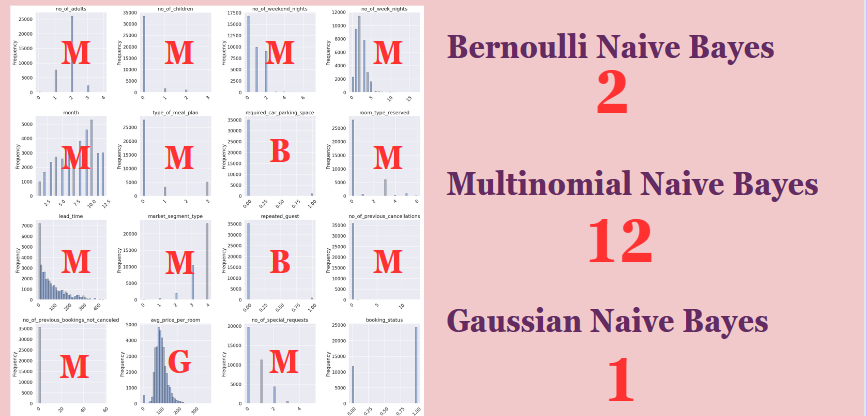

**Multinomial Distribution**  

โมเดลที่มี _r หมายถึง ลบ features ที่มีความสัมพันธ์กับ label ที่น้อยกว่า 0.1      
โมเดลที่ ไม่มี _r features ดั้งเดิม

**train model**

In [ ]:
mnb_r = MultinomialNB(alpha=1)
mnb = MultinomialNB(alpha=1)

mnb_r.fit(X_train_del, y_train)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1)

**Accuracy**

In [ ]:
y_pred_mnb_r = mnb_r.predict(X_test_del)
y_pred_mnb = mnb.predict(X_test)

print("Accuracy of Multinomial_r Naive Bayes:", accuracy_score(y_test, y_pred_mnb_r))
print("Accuracy of Multinomial Naive Bayes:", accuracy_score(y_test, y_pred_mnb))

Accuracy of Multinomial_r Naive Bayes: 0.6931692477876106
Accuracy of Multinomial Naive Bayes: 0.6995298672566371


**Bernoulli Distribution**

โมเดลที่มี _r หมายถึง ลบ features ที่มีความสัมพันธ์กับ label ที่น้อยกว่า 0.1      
โมเดลที่ ไม่มี _r features ดั้งเดิม

_edit หมายถึง features มีการเปลี่ยนแปลงให้เหมาะกับ Distribution

**train model**

In [ ]:
ber_r = BernoulliNB(alpha=1)
ber = BernoulliNB(alpha=1)
ber_edit_r = BernoulliNB()
ber_edit = BernoulliNB()


ber_r.fit(X_train_del, y_train)
ber.fit(X_train, y_train)
ber_edit_r.fit(X_train_Bernoulli_edit_del,y_train)
ber_edit.fit(X_train_Bernoulli_edit,y_train)


BernoulliNB()

**Accuracy**

In [ ]:
y_pred_ber_r = ber_r.predict(X_test_del)
y_pred_ber = ber.predict(X_test)
y_pred_ber_edit_r = ber_edit_r.predict(X_test_Bernoulli_edit_del)
y_pred_ber_edit = ber_edit.predict(X_test_Bernoulli_edit)

print("Accuracy of BernoulliNB_r Naive Bayes:", accuracy_score(y_test, y_pred_ber_r))
print("Accuracy of BernoulliNB Naive Bayes:", accuracy_score(y_test, y_pred_ber))
print("Accuracy of BernoulliNB_edit_r Naive Bayes:", accuracy_score(y_test, y_pred_ber_edit_r))
print("Accuracy of BernoulliNB_edit Naive Bayes:", accuracy_score(y_test, y_pred_ber_edit))

Accuracy of BernoulliNB_r Naive Bayes: 0.6713219026548672
Accuracy of BernoulliNB Naive Bayes: 0.6904037610619469
Accuracy of BernoulliNB_edit_r Naive Bayes: 0.7288440265486725
Accuracy of BernoulliNB_edit Naive Bayes: 0.7459900442477876


**Gaussian Distribution**

โมเดลที่มี _r หมายถึง ลบ features ที่มีความสัมพันธ์กับ label ที่น้อยกว่า 0.1      
โมเดลที่ ไม่มี _r features ดั้งเดิม


**train model**

In [ ]:
gnb_r = GaussianNB()
gnb = GaussianNB()

gnb_r.fit(X_train_del, y_train)
gnb.fit(X_train, y_train)

GaussianNB()

**Accuracy**

In [ ]:
y_pred_gnb_r = gnb_r.predict(X_test_del)
y_pred_gnb = gnb.predict(X_test)

print("Accuracy of Gaussian_r Naive Bayes:", accuracy_score(y_test, y_pred_gnb_r))
print("Accuracy of Gaussian Naive Bayes:", accuracy_score(y_test, y_pred_gnb))

Accuracy of Gaussian_r Naive Bayes: 0.5633296460176991
Accuracy of Gaussian Naive Bayes: 0.40583517699115046


# **1.Summary Accuracy**

In [ ]:
print("ไม่ลบ Outliner")
print("Accuracy of Multinomial_r Naive Bayes:", accuracy_score(y_test, y_pred_mnb_r))
print("Accuracy of Multinomial Naive Bayes:", accuracy_score(y_test, y_pred_mnb))

print("Accuracy of BernoulliNB_r Naive Bayes:", accuracy_score(y_test, y_pred_ber_r))
print("Accuracy of BernoulliNB Naive Bayes:", accuracy_score(y_test, y_pred_ber))
print("Accuracy of BernoulliNB_edit_r Naive Bayes:", accuracy_score(y_test, y_pred_ber_edit_r))
print("Accuracy of BernoulliNB_edit Naive Bayes:", accuracy_score(y_test, y_pred_ber_edit))

print("Accuracy of Gaussian_r Naive Bayes:", accuracy_score(y_test, y_pred_gnb_r))
print("Accuracy of Gaussian Naive Bayes:", accuracy_score(y_test, y_pred_gnb))

ไม่ลบ Outliner
Accuracy of Multinomial_r Naive Bayes: 0.6931692477876106
Accuracy of Multinomial Naive Bayes: 0.6995298672566371
Accuracy of BernoulliNB_r Naive Bayes: 0.6713219026548672
Accuracy of BernoulliNB Naive Bayes: 0.6904037610619469
Accuracy of BernoulliNB_edit_r Naive Bayes: 0.7288440265486725
Accuracy of BernoulliNB_edit Naive Bayes: 0.7459900442477876
Accuracy of Gaussian_r Naive Bayes: 0.5633296460176991
Accuracy of Gaussian Naive Bayes: 0.40583517699115046


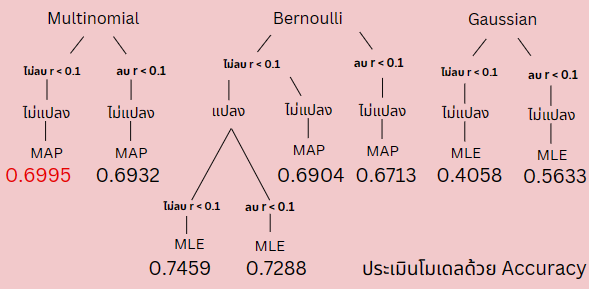

ผลสรุปว่า จากที่ อนุมานตอนแรกว่า เป็น Multinomial น่าจะเหมาะสมที่สุดสำหรับ datasets ชุดนี้ ผลลัพธ์คือ จริง และ Bernoulli เมื่อทำการแปลงข้อมูลให้เหมาะสมกับ Distribution นี้ ผลลัพธ์ดีขึ้นอย่างมาก ซึ่งสามารถตีความได้ว่า Naive Bayes ควรแปลงข้อมูลให้ เหมาะสมกับ Distributions นั้นๆ จะทำให้ model ทำงานได้อย่างมีประสิทธิภาพ      

ประเด็นที่ 2 คือ เมื่อตัดfeatures ที่มีความสัมพันธ์กับ label น้อยๆออก ผลคือ model Multinomial , Bernoulli ไม่ได้ช่วยให้ model มีประสิทธิภาพขึ้น แต่ Gaussian ดีขึ้น อาจจะเป็นเพราะว่า datasets ชุดนี้มีแต่ ข้อมูลที่สำหรับ Multinomial Bernoulli ส่วนใหญ่ และเมื่อตัดออก ทำให้ Gaussian มีประสิทธิภาพดีขึ้น แต่ในส่วน Multinomial , Bernoulli ประสิทธิภาพลดลงก็จริง แต่ว่าลดการ Overfiting ได้ เนื่องจาก จำนวน columns เยอะ


# **Model Evaluation**
**ขั้นตอนการทำให้ Model ดีขึ้นซึ่งจะทำตามขั้นตอนดังนี้**   
1.ลบ outliner ออก      
2.อิสระต่อกัน (Naiva Bayes มองว่าทุก Features อิสระต่อกัน)     
2.ทดลองใช้ Distributions Categorical

# **1.Delete Outliner**

ลบ Outliner ออกเพราะว่าจะลองดูว่าผลลัพธ์เป็นอย่างไร ซึ่ง Outliner ที่ลบออกจะเป็นในส่วน Average Price Per Room

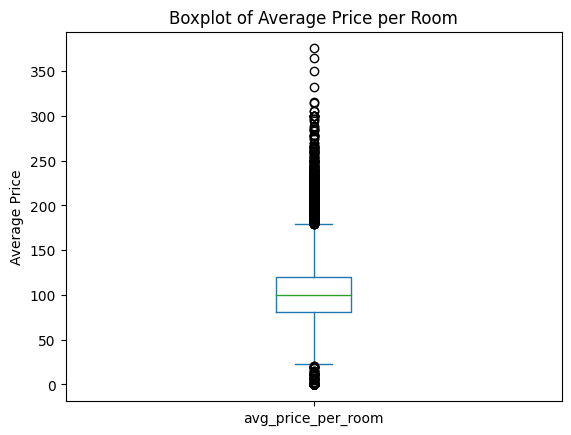

In [ ]:
df['avg_price_per_room'].plot(kind='box')

# แสดงผลลัพธ์
plt.title('Boxplot of Average Price per Room')
plt.ylabel('Average Price')
plt.show()

จากภาพเห็นได้ว่า มีราคาที่เป็น 0 เยอะซึ่งในเรื่องของโปรโมชั่น มันก็ดูเยอะเกินไป ที่ราคาต่อห้องจะเป็น 0 และ ราคาก็น้อยมาก และในส่วน ราคาที่สูงมากๆ มันห่างจากค่าเฉลี่ยเยอะจนเกินไป มีเยอะจนเกินไป ดังนั้น จะทำการตัดแถวออก

In [ ]:
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_ourline = df[(df['avg_price_per_room'] >= lower_bound) & (df['avg_price_per_room'] <= upper_bound)]

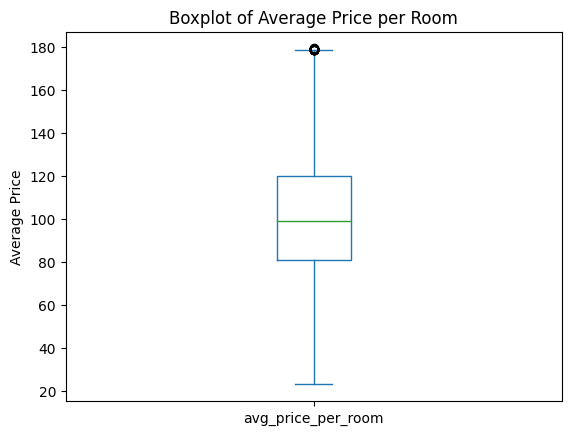

In [ ]:
df_ourline['avg_price_per_room'].plot(kind='box')

# แสดงผลลัพธ์
plt.title('Boxplot of Average Price per Room')
plt.ylabel('Average Price')
plt.show()

In [ ]:
df.shape

(36156, 16)

เหลือ row 34540 แถว

In [ ]:
df_ourline.shape

(34540, 16)

**เตรียมข้อมูลอีกรอบ**

In [ ]:
X_train, X_test, y_train_outliner, y_test_outliner = train_test_split(df_ourline.iloc[:, :-1], df_ourline.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
X_train_Bernoulli_edit_outliner = X_train.copy()
X_test_Bernoulli_edit_outliner = X_test.copy()
X_train_outliner = X_train.copy() #ไม่ลบ features
X_test_outliner = X_test.copy() #ไม่ลบ features
X_train_del_outliner = X_train.drop(columns=sorted_corr[sorted_corr < 0.1].index)
X_test_del_outliner = X_test.drop(columns=sorted_corr[sorted_corr < 0.1].index)

def categorize_data(value, mean):
    if value <= mean:
        return '0'
    else:
        return '1'

def categorize_column(column, mean):
    return column.apply(categorize_data, mean=mean)

# หาค่าเฉลี่ยของแต่ละคอลัมน์ X_train
mean_lead_time = X_train_Bernoulli_edit_outliner['lead_time'].mean()
mean_avg_price_per_room = X_train_Bernoulli_edit_outliner['avg_price_per_room'].mean()
mean_no_of_adults = X_train_Bernoulli_edit_outliner['no_of_adults'].mean()
mean_no_of_children = X_train_Bernoulli_edit_outliner['no_of_children'].mean()
mean_no_of_weekend_nights = X_train_Bernoulli_edit_outliner['no_of_weekend_nights'].mean()
mean_no_of_week_nights = X_train_Bernoulli_edit_outliner['no_of_week_nights'].mean()
mean_no_of_previous_cancellations = X_train_Bernoulli_edit_outliner['no_of_previous_cancellations'].mean()
mean_no_of_previous_bookings_not_canceled = X_train_Bernoulli_edit_outliner['no_of_previous_bookings_not_canceled'].mean()
mean_no_of_special_requests = X_train_Bernoulli_edit_outliner['no_of_special_requests'].mean()

# หาค่าเฉลี่ยของแต่ละคอลัมน์ X_test
mean_lead_time = X_test_Bernoulli_edit_outliner['lead_time'].mean()
mean_avg_price_per_room = X_test_Bernoulli_edit_outliner['avg_price_per_room'].mean()
mean_no_of_adults = X_test_Bernoulli_edit_outliner['no_of_adults'].mean()
mean_no_of_children = X_test_Bernoulli_edit_outliner['no_of_children'].mean()
mean_no_of_weekend_nights = X_test_Bernoulli_edit_outliner['no_of_weekend_nights'].mean()
mean_no_of_week_nights = X_test_Bernoulli_edit_outliner['no_of_week_nights'].mean()
mean_no_of_previous_cancellations = X_test_Bernoulli_edit_outliner['no_of_previous_cancellations'].mean()
mean_no_of_previous_bookings_not_canceled = X_test_Bernoulli_edit_outliner['no_of_previous_bookings_not_canceled'].mean()
mean_no_of_special_requests = X_test_Bernoulli_edit_outliner['no_of_special_requests'].mean()

# ใช้ฟังก์ชันสำหรับการแปลงค่าแต่ละคอลัมน์ X_train
X_train_Bernoulli_edit_outliner['month_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['month'], 6)
X_train_Bernoulli_edit_outliner['lead_time_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['lead_time'], mean_lead_time)
X_train_Bernoulli_edit_outliner['avg_price_per_room_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['avg_price_per_room'], mean_avg_price_per_room)
X_train_Bernoulli_edit_outliner['no_of_adults_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['no_of_adults'], mean_no_of_adults)
X_train_Bernoulli_edit_outliner['no_of_children_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['no_of_children'], mean_no_of_children)
X_train_Bernoulli_edit_outliner['no_of_weekend_nights_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['no_of_weekend_nights'], mean_no_of_weekend_nights)
X_train_Bernoulli_edit_outliner['no_of_week_nights_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['no_of_week_nights'], mean_no_of_week_nights)
X_train_Bernoulli_edit_outliner['no_of_previous_cancellations_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['no_of_previous_cancellations'], mean_no_of_previous_cancellations)
X_train_Bernoulli_edit_outliner['no_of_previous_bookings_not_canceled_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['no_of_previous_bookings_not_canceled'], mean_no_of_previous_bookings_not_canceled)
X_train_Bernoulli_edit_outliner['no_of_special_requests_categorize'] = categorize_column(X_train_Bernoulli_edit_outliner['no_of_special_requests'], mean_no_of_previous_bookings_not_canceled)

X_train_Bernoulli_edit_outliner.drop(columns=['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests','month','lead_time','avg_price_per_room'], inplace=True)

# ใช้ฟังก์ชันสำหรับการแปลงค่าแต่ละคอลัมน์ X_test
X_test_Bernoulli_edit_outliner['month_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['month'], 6)
X_test_Bernoulli_edit_outliner['lead_time_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['lead_time'], mean_lead_time)
X_test_Bernoulli_edit_outliner['avg_price_per_room_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['avg_price_per_room'], mean_avg_price_per_room)
X_test_Bernoulli_edit_outliner['no_of_adults_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['no_of_adults'], mean_no_of_adults)
X_test_Bernoulli_edit_outliner['no_of_children_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['no_of_children'], mean_no_of_children)
X_test_Bernoulli_edit_outliner['no_of_weekend_nights_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['no_of_weekend_nights'], mean_no_of_weekend_nights)
X_test_Bernoulli_edit_outliner['no_of_week_nights_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['no_of_week_nights'], mean_no_of_week_nights)
X_test_Bernoulli_edit_outliner['no_of_previous_cancellations_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['no_of_previous_cancellations'], mean_no_of_previous_cancellations)
X_test_Bernoulli_edit_outliner['no_of_previous_bookings_not_canceled_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['no_of_previous_bookings_not_canceled'], mean_no_of_previous_bookings_not_canceled)
X_test_Bernoulli_edit_outliner['no_of_special_requests_categorize'] = categorize_column(X_test_Bernoulli_edit_outliner['no_of_special_requests'], mean_no_of_previous_bookings_not_canceled)

X_test_Bernoulli_edit_outliner.drop(columns=['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests','month','lead_time','avg_price_per_room'], inplace=True)

# ทำ One-Hot Encoding ด้วย pd.get_dummies()
one_hot_encoded = pd.get_dummies(X_train_Bernoulli_edit_outliner['type_of_meal_plan'], prefix='meal_plan')
one_hot_encoded_2 = pd.get_dummies(X_train_Bernoulli_edit_outliner['room_type_reserved'], prefix='room_type')
one_hot_encoded_3 = pd.get_dummies(X_train_Bernoulli_edit_outliner['market_segment_type'], prefix='Type_segment')

one_hot_encoded_test = pd.get_dummies(X_test_Bernoulli_edit_outliner['type_of_meal_plan'], prefix='meal_plan')
one_hot_encoded_2_test = pd.get_dummies(X_test_Bernoulli_edit_outliner['room_type_reserved'], prefix='room_type')
one_hot_encoded_3_test = pd.get_dummies(X_test_Bernoulli_edit_outliner['market_segment_type'], prefix='Type_segment')


# เชื่อมรายการ One-Hot Encoded เข้ากับ DataFrame หลัก
X_train_Bernoulli_edit_outliner = pd.concat([X_train_Bernoulli_edit_outliner, one_hot_encoded], axis=1)
X_train_Bernoulli_edit_outliner = pd.concat([X_train_Bernoulli_edit_outliner, one_hot_encoded_2], axis=1)
X_train_Bernoulli_edit_outliner = pd.concat([X_train_Bernoulli_edit_outliner, one_hot_encoded_3], axis=1)

X_test_Bernoulli_edit_outliner = pd.concat([X_test_Bernoulli_edit_outliner, one_hot_encoded_test], axis=1)
X_test_Bernoulli_edit_outliner = pd.concat([X_test_Bernoulli_edit_outliner, one_hot_encoded_2_test], axis=1)
X_test_Bernoulli_edit_outliner = pd.concat([X_test_Bernoulli_edit_outliner, one_hot_encoded_3_test], axis=1)

# drop columns เก่าออก
X_train_Bernoulli_edit_outliner.drop(columns=['type_of_meal_plan'], inplace=True)
X_train_Bernoulli_edit_outliner.drop(columns=['room_type_reserved'], inplace=True)
X_train_Bernoulli_edit_outliner.drop(columns=['market_segment_type'], inplace=True)

X_test_Bernoulli_edit_outliner.drop(columns=['type_of_meal_plan'], inplace=True)
X_test_Bernoulli_edit_outliner.drop(columns=['room_type_reserved'], inplace=True)
X_test_Bernoulli_edit_outliner.drop(columns=['market_segment_type'], inplace=True)

#เปลี่ยนชื่อ columns ที่แปลงออกมา
X_train_Bernoulli_edit_outliner['meal_plan1'] = X_train_Bernoulli_edit_outliner['meal_plan_0'].astype(int)
X_train_Bernoulli_edit_outliner['meal_plan2'] = X_train_Bernoulli_edit_outliner['meal_plan_1'].astype(int)
# X_train_Bernoulli_edit_outliner['meal_plan3'] = X_train_Bernoulli_edit_outliner['meal_plan_2'].astype(int)
X_train_Bernoulli_edit_outliner['not selected'] = X_train_Bernoulli_edit_outliner['meal_plan_3'].astype(int)

X_train_Bernoulli_edit_outliner['roomtype1'] = X_train_Bernoulli_edit_outliner['room_type_0'].astype(int)
X_train_Bernoulli_edit_outliner['roomtype2'] = X_train_Bernoulli_edit_outliner['room_type_1'].astype(int)
X_train_Bernoulli_edit_outliner['roomtype3'] = X_train_Bernoulli_edit_outliner['room_type_2'].astype(int)
X_train_Bernoulli_edit_outliner['roomtype4'] = X_train_Bernoulli_edit_outliner['room_type_3'].astype(int)
X_train_Bernoulli_edit_outliner['roomtype5'] = X_train_Bernoulli_edit_outliner['room_type_4'].astype(int)
X_train_Bernoulli_edit_outliner['roomtype6'] = X_train_Bernoulli_edit_outliner['room_type_5'].astype(int)
X_train_Bernoulli_edit_outliner['roomtype7'] = X_train_Bernoulli_edit_outliner['room_type_6'].astype(int)

X_train_Bernoulli_edit_outliner['booking_Aviation'] = X_train_Bernoulli_edit_outliner['Type_segment_0'].astype(int)
X_train_Bernoulli_edit_outliner['booking_Complementary'] = X_train_Bernoulli_edit_outliner['Type_segment_1'].astype(int)
X_train_Bernoulli_edit_outliner['booking_Corporate'] = X_train_Bernoulli_edit_outliner['Type_segment_2'].astype(int)
X_train_Bernoulli_edit_outliner['booking_Offline'] = X_train_Bernoulli_edit_outliner['Type_segment_3'].astype(int)
X_train_Bernoulli_edit_outliner['booking_Online'] = X_train_Bernoulli_edit_outliner['Type_segment_4'].astype(int)


X_test_Bernoulli_edit_outliner['meal_plan1'] = X_test_Bernoulli_edit_outliner['meal_plan_0'].astype(int)
X_test_Bernoulli_edit_outliner['meal_plan2'] = X_test_Bernoulli_edit_outliner['meal_plan_1'].astype(int)
# X_test_Bernoulli_edit_outliner['meal_plan3'] = X_test_Bernoulli_edit_outliner['meal_plan_2'].astype(int)
X_test_Bernoulli_edit_outliner['not selected'] = X_test_Bernoulli_edit_outliner['meal_plan_3'].astype(int)

X_test_Bernoulli_edit_outliner['roomtype1'] = X_test_Bernoulli_edit_outliner['room_type_0'].astype(int)
X_test_Bernoulli_edit_outliner['roomtype2'] = X_test_Bernoulli_edit_outliner['room_type_1'].astype(int)
X_test_Bernoulli_edit_outliner['roomtype3'] = X_test_Bernoulli_edit_outliner['room_type_2'].astype(int)
X_test_Bernoulli_edit_outliner['roomtype4'] = X_test_Bernoulli_edit_outliner['room_type_3'].astype(int)
X_test_Bernoulli_edit_outliner['roomtype5'] = X_test_Bernoulli_edit_outliner['room_type_4'].astype(int)
X_test_Bernoulli_edit_outliner['roomtype6'] = X_test_Bernoulli_edit_outliner['room_type_5'].astype(int)
X_test_Bernoulli_edit_outliner['roomtype7'] = X_test_Bernoulli_edit_outliner['room_type_6'].astype(int)

X_test_Bernoulli_edit_outliner['booking_Aviation'] = X_test_Bernoulli_edit_outliner['Type_segment_0'].astype(int)
X_test_Bernoulli_edit_outliner['booking_Complementary'] = X_test_Bernoulli_edit_outliner['Type_segment_1'].astype(int)
X_test_Bernoulli_edit_outliner['booking_Corporate'] = X_test_Bernoulli_edit_outliner['Type_segment_2'].astype(int)
X_test_Bernoulli_edit_outliner['booking_Offline'] = X_test_Bernoulli_edit_outliner['Type_segment_3'].astype(int)
X_test_Bernoulli_edit_outliner['booking_Online'] = X_test_Bernoulli_edit_outliner['Type_segment_4'].astype(int)

#ลบ columns เก่าออก
X_train_Bernoulli_edit_outliner.drop(columns=['meal_plan_0','meal_plan_1','meal_plan_3'], inplace=True)
X_train_Bernoulli_edit_outliner.drop(columns=['room_type_0','room_type_1','room_type_2','room_type_3','room_type_4','room_type_5','room_type_6'], inplace=True)
X_train_Bernoulli_edit_outliner.drop(columns=['Type_segment_0','Type_segment_1','Type_segment_2','Type_segment_3','Type_segment_4'], inplace=True)

X_test_Bernoulli_edit_outliner.drop(columns=['meal_plan_0','meal_plan_1','meal_plan_3'], inplace=True)
X_test_Bernoulli_edit_outliner.drop(columns=['room_type_0','room_type_1','room_type_2','room_type_3','room_type_4','room_type_5','room_type_6'], inplace=True)
X_test_Bernoulli_edit_outliner.drop(columns=['Type_segment_0','Type_segment_1','Type_segment_2','Type_segment_3','Type_segment_4'], inplace=True)

corr_matrix_ber = pd.concat([X_train_Bernoulli_edit_outliner, y_train], axis=1).corr()
sort_ber_edit = corr_matrix_ber['booking_status'].abs().sort_values()

# X_train_Bernoulli_edit_outliner = X_train.copy() #แก้ไขข้อมูล
# X_test_Bernoulli_edit_outliner = X_test.copy() #แก้ไขข้อมูล
X_train_Bernoulli_edit_del_outliner = X_train_Bernoulli_edit_outliner.drop(columns=sort_ber_edit[sort_ber_edit < 0.1].index) #ลบ features
X_test_Bernoulli_edit_del_outliner = X_test_Bernoulli_edit_outliner.drop(columns=sort_ber_edit[sort_ber_edit < 0.1].index) #ลบ features
# X_train_outliner = X_train.copy() #ไม่ลบ features
# X_test_outliner = X_test.copy() #ไม่ลบ features
# X_train_del_outliner = X_train.drop(columns=sorted_corr[sorted_corr < 0.1].index) #ลบ features
# X_test_del_outliner = X_train.drop(columns=sorted_corr[sorted_corr < 0.1].index) #ลบ features



**Train model อีกรอบ**

**Multinomial**

In [ ]:
mnb_r_outliner = MultinomialNB(alpha=1)
mnb_outliner = MultinomialNB(alpha=1)

mnb_r_outliner.fit(X_train_del_outliner, y_train_outliner)
mnb_outliner.fit(X_train_outliner, y_train_outliner)

y_pred_mnb_r_outliner = mnb_r_outliner.predict(X_test_del_outliner)
y_pred_mnb_outliner = mnb_outliner.predict(X_test_outliner)

print("Accuracy of Multinomial_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_mnb_r_outliner))
print("Accuracy of Multinomial_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_mnb_outliner))

Accuracy of Multinomial_r_outliner Naive Bayes: 0.7028083381586566
Accuracy of Multinomial_outliner Naive Bayes: 0.7071511291256514


**Bernoulli**

In [ ]:
ber_r_outliner = BernoulliNB(alpha=1)
ber_outliner = BernoulliNB(alpha=1)
ber_edit_r_outliner = BernoulliNB()
ber_edit_outliner = BernoulliNB()


ber_r_outliner.fit(X_train_del_outliner, y_train_outliner)
ber_outliner.fit(X_train_outliner, y_train_outliner)
ber_edit_r_outliner.fit(X_train_Bernoulli_edit_del_outliner,y_train_outliner)
ber_edit_outliner.fit(X_train_Bernoulli_edit_outliner,y_train_outliner)

y_pred_ber_r_outliner = ber_r_outliner.predict(X_test_del_outliner)
y_pred_ber_outliner = ber_outliner.predict(X_test_outliner)
y_pred_ber_edit_r_outliner = ber_edit_r_outliner.predict(X_test_Bernoulli_edit_del_outliner)
y_pred_ber_edit_outliner = ber_edit_outliner.predict(X_test_Bernoulli_edit_outliner)

print("Accuracy of BernoulliNB_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_ber_r_outliner))
print("Accuracy of BernoulliNB_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_ber_outliner))
print("Accuracy of BernoulliNB_edit_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_ber_edit_r_outliner))
print("Accuracy of BernoulliNB_edit_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_ber_edit_outliner))

Accuracy of BernoulliNB_r_outliner Naive Bayes: 0.6625651418645049
Accuracy of BernoulliNB_outliner Naive Bayes: 0.6702374059061957
Accuracy of BernoulliNB_edit_r_outliner Naive Bayes: 0.7358135495078171
Accuracy of BernoulliNB_edit_outliner Naive Bayes: 0.7478286045165026


**Gaussian**

In [ ]:
gnb_r_outliner = GaussianNB()
gnb_outliner = GaussianNB()

gnb_r_outliner.fit(X_train_del_outliner, y_train_outliner)
gnb_outliner.fit(X_train_outliner, y_train_outliner)
y_pred_gnb_r_outliner = gnb_r_outliner.predict(X_test_del_outliner)
y_pred_gnb_outliner = gnb_outliner.predict(X_test_outliner)

print("Accuracy of Gaussian_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_gnb_r_outliner))
print("Accuracy of Gaussian_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_gnb_outliner))

Accuracy of Gaussian_r_outliner Naive Bayes: 0.6108859293572669
Accuracy of Gaussian_outliner Naive Bayes: 0.3985234510712218


**Summary Accuracy (outliner vs not outliner)**

In [ ]:
print("ไม่ลบ Outliner")
print("Accuracy of Multinomial_r Naive Bayes:", accuracy_score(y_test, y_pred_mnb_r))
print("Accuracy of Multinomial Naive Bayes:", accuracy_score(y_test, y_pred_mnb))

print("Accuracy of BernoulliNB_r Naive Bayes:", accuracy_score(y_test, y_pred_ber_r))
print("Accuracy of BernoulliNB Naive Bayes:", accuracy_score(y_test, y_pred_ber))
print("Accuracy of BernoulliNB_edit_r Naive Bayes:", accuracy_score(y_test, y_pred_ber_edit_r))
print("Accuracy of BernoulliNB_edit Naive Bayes:", accuracy_score(y_test, y_pred_ber_edit))

print("Accuracy of Gaussian_r Naive Bayes:", accuracy_score(y_test, y_pred_gnb_r))
print("Accuracy of Gaussian Naive Bayes:", accuracy_score(y_test, y_pred_gnb))

#................................................................................
print("*"*50)

print("ลบ Outliner")
print("Accuracy of Multinomial_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_mnb_r_outliner))
print("Accuracy of Multinomial_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_mnb_outliner))

print("Accuracy of BernoulliNB_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_ber_r_outliner))
print("Accuracy of BernoulliNB_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_ber_outliner))
print("Accuracy of BernoulliNB_edit_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_ber_edit_r_outliner))
print("Accuracy of BernoulliNB_edit_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_ber_edit_outliner))

print("Accuracy of Gaussian_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_gnb_r_outliner))
print("Accuracy of Gaussian_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_gnb_outliner))

ไม่ลบ Outliner
Accuracy of Multinomial_r Naive Bayes: 0.6931692477876106
Accuracy of Multinomial Naive Bayes: 0.6995298672566371
Accuracy of BernoulliNB_r Naive Bayes: 0.6713219026548672
Accuracy of BernoulliNB Naive Bayes: 0.6904037610619469
Accuracy of BernoulliNB_edit_r Naive Bayes: 0.7288440265486725
Accuracy of BernoulliNB_edit Naive Bayes: 0.7459900442477876
Accuracy of Gaussian_r Naive Bayes: 0.5633296460176991
Accuracy of Gaussian Naive Bayes: 0.40583517699115046
**************************************************
ลบ Outliner
Accuracy of Multinomial_r_outliner Naive Bayes: 0.7028083381586566
Accuracy of Multinomial_outliner Naive Bayes: 0.7071511291256514
Accuracy of BernoulliNB_r_outliner Naive Bayes: 0.6625651418645049
Accuracy of BernoulliNB_outliner Naive Bayes: 0.6702374059061957
Accuracy of BernoulliNB_edit_r_outliner Naive Bayes: 0.7358135495078171
Accuracy of BernoulliNB_edit_outliner Naive Bayes: 0.7478286045165026
Accuracy of Gaussian_r_outliner Naive Bayes: 0.61088592

เมื่อนำ ข้อมูลลบ outliner แล้วผลลัพธ์ดีขึ้น โมเดลทำได้ดีขึ้น แต่มี โมเดล Bernoulli ไม่ดีขึ้นลดลง และ Gaussian ที่ไม่ดีขึ้นเฉพาะ ที่ไม่ได้ตัด Features ซึ่งสาเหตุของ Bernoulli ที่ลดลงอาจจะแย่ลงก็จริง แต่อาจจะลดพวก Overfiting ได้   

และโมเดลที่คิดว่าดีที่สุด คือ Accuracy of Multinomial_r_outliner Naive Bayes: 0.7028083381586566   

เหตุผลที่หนึ่ง คือ มีค่า Accuracy สูงที่สุดโดย Bernoulli สูงที่สุดก็จริงแต่มันเปลี่ยนแปลงข้อมูล

เหตุผลที่สอง คือ มีการตัด Features ความสัมพันธ์น้อยออก และลบ outliner ออก ซึ่งลดการเกิด Overfiting


# **2.Naive bayes assume features independent**   
Naive bayes มองว่าทุก features นั้นเป็นอิสระต่อกัน ดังนั้นจึงจะตัด features ที่ไม่อิสระต่อกันออกแล้วดูว่า ผลลัพธ์จะเป็นอย่างไร


In [ ]:
X_train_del_outliner.head(2)

,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
7144,146,3,0,75.0,0
21621,164,3,0,100.0,0


In [ ]:
X_train_del_outliner.drop(columns='avg_price_per_room').head(2)

,lead_time,market_segment_type,repeated_guest,no_of_special_requests
7144,146,3,0,0
21621,164,3,0,0


พบว่า avg_price_per_room ไม่อิสระต่อกันเพราะว่า feature นี้มีผลต่อ feature อื่นๆ เช่น market_segment_type , no_of_special_requests จะทำให้ avg_price_per_room ราคาลดลง หรือเพิ่มขึ้น

**ทำการ train เพื่อเปรียบเทียบ**

In [ ]:
X_train_del_outliner_ddl = X_train_del_outliner.drop(columns='avg_price_per_room')
X_test_del_outliner_ddl = X_test_del_outliner.drop(columns='avg_price_per_room')
mnb_r_outliner_ddl = MultinomialNB(alpha=1)
mnb_r_outliner_ddl.fit(X_train_del_outliner_ddl, y_train_outliner)
y_pred_mnb_r_outliner_ddl = mnb_r_outliner_ddl.predict(X_test_del_outliner_ddl)


In [ ]:
#คะแนนดั้งเดิม ตัด features < 0.1 ออก ลบ Outliner ออก
print("#คะแนนดั้งเดิม ตัด features < 0.1 ออก ลบ Outliner ออก ")
print("Accuracy of Multinomial_r_outliner Naive Bayes:", accuracy_score(y_test_outliner, y_pred_mnb_r_outliner))

print("*"*50)

#คะแนนใหม่ ตัด features < 0.1 ออก ลบ Outliner ออก และลบ feature ไม่อิสระต่อกันออก
print("#คะแนนใหม่ ตัด features < 0.1 ออก ลบ Outliner ออก และลบ feature ไม่อิสระต่อกันออก")
print("Accuracy of Multinomial_r_outline_ddl Naive Bayes:", accuracy_score(y_test_outliner, y_pred_mnb_r_outliner_ddl))


#คะแนนดั้งเดิม ตัด features < 0.1 ออก ลบ Outliner ออก 
Accuracy of Multinomial_r_outliner Naive Bayes: 0.7028083381586566
**************************************************
#คะแนนใหม่ ตัด features < 0.1 ออก ลบ Outliner ออก และลบ feature ไม่อิสระต่อกันออก
Accuracy of Multinomial_r_outline_ddl Naive Bayes: 0.7376954255935148


**ผลสรุปคือ Naive bayes มีแต่ features อิสระต่อกันดีกว่า**

# **Summary Naive Bayes**

โดยสรุปของ Naive Bayes    
Bernoulli Naive Bayes: จะเหมาะสำหรับ ข้อมูลที่เป็น Binary  
Multinomial Naive Bayes: เหมาะสำหรับข้อมูลที่เป็น Frequency    
Gaussian Naive Bayes: เหมาะสำหรับข้อมูลที่เป็น   Continue   

และ Naive Bayes เหมาะสำหรับข้อมูลที่เป็น อิสระต่อกันซึ่งจะทำให้ประสิทธิภาพโมเดลดีขึ้น

ลบ Features ที่มีความสัมพันธ์น้อยๆกับ Label ออกหรือลบ outliner ออกก็อาจไม่ได้ทำให้ model ประสิทธิภาพดีขึ้น

ในการใช้ Naive Bayes ควรเลือกใช้ ข้อมูลให้เหมาะสมกับ Distributions นั้นๆหรือถ้าเป็นไปได้เปลี่ยนแปลงข้อมูลให้เหมาะกับ Distributions นั้นๆ หรือถ้ายังไม่ดีขึ้นหรือเปลี่ยนข้อมูลแล้ว มันต่างกันจนเกินไป อาจจะต้องเลือกใช้ model อื่น

อ้างอิง https://scikit-learn.org/stable/modules/naive_bayes.html